<a href="https://colab.research.google.com/github/vladgap/LLC/blob/main/LLC%20simulation%20equilibrium%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"


In [2]:
pip install MLNN

  Preparing metadata (setup.py) ... done
  Created wheel for MLNN: filename=MLNN-2.2-py3-none-any.whl size=7996 sha256=e40749e71f6a0113c4507683494cc6ba50346933b6c9bf60c9c979c024a33443
  Stored in directory: /root/.cache/pip/wheels/06/5e/5a/c3d048392a71e896cf957c2516f90eece8f99708e60adacc0c
Successfully built MLNN


In [3]:
from MLNN import*

In [4]:
def CopyPasteToArray(a):
  if a.startswith('\n'):
    b=a[1:]
  else:
    b=a
  if b.endswith('\n'):
    b=b[:-1]
  c=b.replace('\t',',')
  d=c.split('\n')
  f=[]
  for e in d:
    if e.replace(',','').replace('.','').isdigit(): # only digits no letters
      f.append(list(eval(e)))
    else:
      f.append(e.split(','))
  return f

# 1 - EQUIL_rotem_lit1
lit data with NN model (7 hidden sigmoids)

In [5]:
data1=pd.DataFrame(data=[
[63.5,	1.3,	42.4,	15.0],
[58.7,	1.2,	36.9,	13.8],
[52.0, 1.0,	27.7,	11.8],
[45.5,	1.0,	18.9,	9.6],
[39.1,	1.4,	10.2,	8.3],
[31.5,	1.5,	5.1,	8.8],
[22.9,	2.0,	2.3,	9.0],
[12.6,	2.2,	0.90,	9.3],
[6.3,	2.4,	0.45,	9.45],
[0.01,	2.6,	0.01,	9.6],
],
columns=['H3PO4_aq', 'solvent_aq', 'H3PO4_org', 'water_org'])

In [6]:
data1.head()

H3PO4_aq  solvent_aq  H3PO4_org  water_org
0      63.5         1.3       42.4       15.0
1      58.7         1.2       36.9       13.8
2      52.0         1.0       27.7       11.8
3      45.5         1.0       18.9        9.6
4      39.1         1.4       10.2        8.3

In [7]:
fig1=go.Figure()
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=data1[data1.columns[i]], name=data1.columns[i])) for i in range(1,4)]
fig1.update_layout(title='', width=1200, height=600,)
fig1.show()

In [8]:
X1=np.array(data1)[:,[0]]
T1=np.array(data1)[:,[1,2,3]]

## Model

### scaling

In [9]:
scaler_X1 = preprocessing.StandardScaler().fit(X1)
scaler_T1 = preprocessing.StandardScaler().fit(T1)

# scaler_X1.mean_, scaler_X1.scale_ = np.zeros(X1.shape[1]), np.ones(X1.shape[1]) # disable scaling
# scaler_T1.mean_, scaler_T1.scale_ = np.zeros(X1.shape[1]), np.ones(X1.shape[1]) # disable scaling

scaler_data1 = [scaler_X1.mean_, scaler_X1.scale_, scaler_T1.mean_, scaler_T1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data1[0], scaler_data1[1])
print('scaler T -- mean, stdev:  ',scaler_data1[2], scaler_data1[3])

X_sc1 = scaler_X1.transform(X1)
T_sc1 = scaler_T1.transform(T1)
X_sc1[0:3]

scaler X -- mean, stdev:   [33.211] [21.13387066]
scaler T -- mean, stdev:   [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


array([[1.433197  ],
       [1.20607344],
       [0.8890468 ]])

In [10]:
def print_scaler_data(scaler_data):
    print('scaler X -- mean, stdev:  ',scaler_data[0], scaler_data[1])
    print('scaler T -- mean, stdev:  ',scaler_data[2], scaler_data[3])

### parameter searching

In [11]:
bp_iter=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')
learning_rate = [0.05, 0.1, 0.5]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc1, T_sc1, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:362: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:445: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:445: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-11-162517e96d7f>:16: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-11-162517e96d7f>:16: RuntimeWarning:

invalid value encountered in scalar subtract



60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [12]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
51            0.1           0.95                  0.0    0.009445   
53            0.1           0.95                  0.0    0.010253   
52            0.1           0.95                  0.0    0.011248   
44            0.1           0.90                  0.0    0.011571   
40            0.1           0.90                  0.0    0.011621   
..            ...            ...                  ...         ...   
68            0.5           0.80                  0.5    3.000000   
77            0.5           0.90                  0.5    3.000000   
89            0.5           0.95                  0.5    3.000000   
65            0.5           0.80                  0.5    3.000000   
67            0.5           0.80                  0.5    3.000208   

    relative_delta  
51   -6.972497e-02  
53   -2.404281e-02  
52   -8.026148e-02  
44   -4.931154e-02  
40   -2.519636e-02  
..             ...  
68    0.000000e+00  
77    0.000000e+00  
89    1.480297e-14  
65    1.480297e-14  
67   -6.284204e-08  

[90 rows x 5 columns]

In [13]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

### running best parameters

In [14]:
bp_iter=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc1, T_sc1, epochs=1500, learning_rate = 0.1, momentum_term = 0.95, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [15]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

### best_weights_for_now

In [16]:
best_weights_for_now2=weights_lists2[0] # 7 hidden
best_weights_for_now2

[[[-0.31980166072323113,
   4.0793986238242566,
   0.08679721458964154,
   -3.0058934116913174,
   -1.8652515863368155,
   0.3518573843763261,
   4.81193568700319]],
 [[-2.5816317297109643,
   -3.1521572436061467,
   -2.5746547086463565,
   1.223012075700519,
   -2.676817461760305,
   -4.29314902912435,
   -9.151719188526192]],
 [[0.18412543640180457, 0.13047020281914865, -0.0027450645379542946],
  [1.9029786975212941, 1.4328234573896892, 4.663288079878937],
  [-0.3827390943186037, 0.2864486901528471, -0.01507584506068857],
  [3.2986133262036, -1.0366740988257426, 2.0975160410496767],
  [2.3852077948416164, -0.19019849230111124, 0.38010696857079246],
  [0.46626062659084194, 0.6162548711655157, 0.2120592208345394],
  [4.447342663440534, 3.612063375900786, 3.4922076266401314]],
 [[-2.9637248461676218, 0.15228883253133194, -2.7120889923289946]]]

In [17]:
manual_best_weights_for_now2=[[[-4.215621245080982,
   -8.235086763118087,
   -1.6251342150606451,
   -6.9206357615871035,
   -3.4092427169369826,
   -7.4263402914028775,
   -3.7003458539301977]],
 [[0.8764395040443358,
   3.9145850159876945,
   -1.5013585830931442,
   -1.194371163565281,
   4.118411550251139,
   5.892242255497829,
   -6.755593628941706]],
 [[-2.6609909047049918, -0.44480776958732143, 1.9256391063013463],
  [2.566022222516618, -0.5042582093932455, -1.432212975592254],
  [1.405004033981333, -0.2988952466228391, 0.5807591718257896],
  [2.0692859230668117, -0.0780871568942863, -0.5145373287488922],
  [-0.7989625307881565, -1.957459884661486, -2.8991426864622065],
  [-0.5821795598385298, -0.22284877970127598, -0.9077232625087237],
  [1.619488070885094, 0.03697105802710269, 0.008613201857731975]],
 [[-0.4010006364699687, 2.4687577407660806, 2.995012357373033]]]

 # 7 relu
 # epochs=1000, learning_rate = 0.1, momentum_term = 0.95, learning_rate_decay = 0
 # loss = .00038

### fitting best parameters

In [18]:
bp1=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')

In [19]:
# bp1.import_weights(best_weights_for_now2)
bp1.import_weights(manual_best_weights_for_now2)
bp1.fit(X_sc1, T_sc1, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [20]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(y=bp1.loss_list[20:], name=''))
print('Initial loss =', bp1.loss_list[0])
print('Final loss =', bp1.loss_list[-1])
# fig1.show()

Initial loss = 0.00038317489657026835
Final loss = 0.00038081061323728493


### prediction

In [21]:
predics1=scaler_T1.inverse_transform(bp1.run(X_sc1))
predics1

array([[1.29918281e+00, 4.24818141e+01, 1.49962517e+01],
       [1.20153909e+00, 3.67329683e+01, 1.38077713e+01],
       [9.98853822e-01, 2.78389142e+01, 1.17944258e+01],
       [1.00094900e+00, 1.88213747e+01, 9.60332916e+00],
       [1.39837341e+00, 1.02414093e+01, 8.29734125e+00],
       [1.50272999e+00, 5.07996128e+00, 8.80178587e+00],
       [1.99276586e+00, 2.28913730e+00, 8.99802472e+00],
       [2.22136370e+00, 9.49095682e-01, 9.29600691e+00],
       [2.37724870e+00, 4.07546881e-01, 9.45913277e+00],
       [2.60699794e+00, 1.89286597e-02, 9.59614282e+00]])

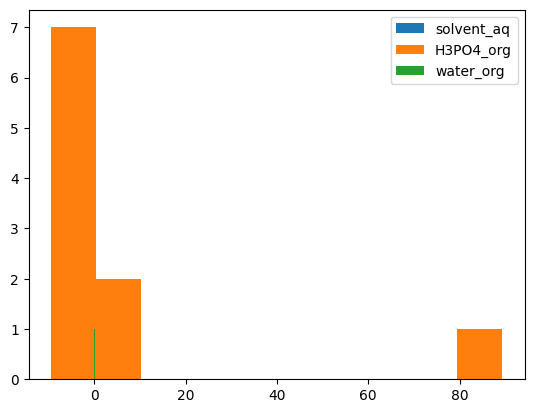

In [22]:
pred=predics1
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T1[:,0])/T1[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T1[:,1])/T1[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T1[:,2])/T1[:,2]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.legend(['solvent_aq', 'H3PO4_org', 'water_org'])
plt.show()

In [23]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("solvent_aq", "H3PO4_org", "water_org"), column_widths=[0.33, 0.33, 0.33],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T1[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T1[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T1[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 3)

fig.add_trace(go.Scatter(x=T1[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T1[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T1[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 3, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=350,
                  margin=dict(l=0, r=0, b=0, t=30))

# fig.update_xaxes(title_text="", range=[0.5, 2], row=1, col=1)
# fig.update_yaxes(title_text="", range=[0.5, 2], row=1, col=1)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=1, secondary_y=True, showgrid=False, tick0=-10, dtick=2)

# fig.update_xaxes(title_text="", range=[0, 30], row=1, col=2)
# fig.update_yaxes(title_text="", range=[0, 30], row=1, col=2)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=2, secondary_y=True, showgrid=False, tickvals=[-10,-5,-1,0,1,5,10])

# fig.update_xaxes(title_text="", range=[0.5, 2], row=1, col=3)
# fig.update_yaxes(title_text="", range=[0.5, 2], row=1, col=3)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=3, secondary_y=True, showgrid=False, tick0=-10, dtick=2)

fig.show()

In [24]:
fig1=go.Figure()
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=data1[data1.columns[i]], name=data1.columns[i])) for i in range(1,4)]
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=predics1[:,i-1], name=data1.columns[i]+' predic')) for i in range(1,4)]
fig1.update_layout(title='', width=1200, height=600,)
fig1.show()

In [25]:
bp1.print_weights()

Layers (input, hidden, output):  [1, 7, 3] sigmoid linear
Hidden layer weights:  [[-4.2162815777330085, -8.236427344741891, -1.6265562154077091, -6.926844604080739, -3.410136445138649, -7.427211500499821, -3.698373385957032]]
Hidden layer biases:  [[0.8749609721309338, 3.915066755231797, -1.5043851456784056, -1.1933274736382808, 4.11803087066856, 5.891291936612865, -6.7529352557888345]]
Outlet layer weights:  [[-2.6637624183906037, -0.44429745776758944, 1.925512185445992], [2.56652197535487, -0.5044852108445952, -1.4308467586235958], [1.4081943772224144, -0.2988396633936384, 0.5790139596771477], [2.0706074705294526, -0.07814100423571195, -0.5147035662833175], [-0.7994591758762682, -1.9576912892382201, -2.8993300894277243], [-0.5818666247735891, -0.22231346757065326, -0.906567414721736], [1.6164616666285654, 0.03723323842515629, 0.009502354390850938]]
Outlet layer biases:  [[-0.4010711584850023, 2.4680696956720007, 2.9941194913517157]]


In [26]:
print (*scaler_data1)

[33.211] [21.13387066] [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


In [27]:
print_scaler_data(scaler_data1)

scaler X -- mean, stdev:   [33.211] [21.13387066]
scaler T -- mean, stdev:   [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


# 2 - EQUIL_rotem_washing2

In [28]:
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	H3PO4_org	water_org	solvent_aq	SO4_org
4.15	0.147	0.0733	9.6	2.5	0.0626
14.9	0.0806	0.359	9.5	2.2	0.0852
28.6	0.0329	1.68	9.3	1.9	0.0787
45.7	0.0106	8.31	8.5	1.6	0.0664
48.2	0.0078	10.7	8.5	1.3	0.0631
49.4	0.0058	12.2	8.7	1.0	0.0641
''')
# data
# data2=pd.DataFrame(data, columns=['H3PO4_aq',	'SO4_aq',	'H3PO4_org',	'water_org',	'solvent_aq',	'SO4_org'])
data2=pd.DataFrame(data[1:], columns=data[0])
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

In [29]:
fig_equil2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2.show()

In [30]:
X2=np.array(data2)[:,[0,1]]
T2=np.array(data2)[:,[2,3,4,5]]

In [31]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2 = preprocessing.StandardScaler().fit(T2)

# scaler_X2.mean_, scaler_X2.scale_ = np.zeros(X2.shape[1]), np.ones(X2.shape[1]) # disable scaling
# scaler_T2.mean_, scaler_T2.scale_ = np.zeros(X2.shape[1]), np.ones(X2.shape[1]) # disable scaling

scaler_data2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2.mean_, scaler_T2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2 = scaler_T2.transform(T2)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667 9.01666667 1.75       0.07001667] [5.00466684 0.46338129 0.51234754 0.00872609]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

### 4 together - 2 hidden * 4

#### parameter searching

In [32]:
bp_iter=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-32-04119081b553>:16: RuntimeWarning:

invalid value encountered in scalar divide



81 82 83 84 85 86 87 88 89 

In [33]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
70          0.050           0.90                  0.0    0.000021   
71          0.050           0.90                  0.0    0.000075   
53          0.010           0.95                  0.0    0.001020   
60          0.050           0.80                  0.0    0.001254   
51          0.010           0.95                  0.0    0.002386   
..            ...            ...                  ...         ...   
5           0.005           0.80                  0.5    1.425216   
9           0.005           0.80                  0.5    1.520507   
8           0.005           0.80                  0.5    1.578154   
38          0.010           0.80                  0.5    1.589196   
7           0.005           0.80                  0.5    2.411992   

    relative_delta  
70       -1.161299  
71        0.596337  
53        0.248900  
60      -14.342812  
51        3.597126  
..             ...  
5        -0.022228  
9        -0.015236  
8        -0.022369  
38       -0.009619  
7        -0.024359  

[90 rows x 5 columns]

In [34]:
# weights_list[64]

In [35]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [36]:
bp_iter=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2, epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [37]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

#### best_weights_for_now

In [38]:
best_weights_for_now3=weights_lists2[4] # 8 hidden
best_weights_for_now3

[[[-0.219180721098263,
   -0.3406711063701573,
   -0.2955112577482156,
   0.18059294665448186,
   -0.45716271654711177,
   -0.19883159498811098,
   1.554662634979324,
   -0.7278072735934407],
  [1.246191843520073,
   -0.7271786056322478,
   2.1018989063755478,
   1.8289141711307035,
   0.9627304871654665,
   1.545160762929411,
   0.3065477310910053,
   -0.6918512480726551]],
 [[-3.468586752401755,
   -0.7046454550382143,
   -5.559773477033772,
   -4.8877600362662506,
   -1.693256665330014,
   -4.529846298229469,
   0.866675177020625,
   -0.5912793391037866]],
 [[0.5471647137850365,
   1.0372756154922842,
   -1.1393264363240219,
   0.1029267243859599],
  [0.008300132877062053,
   0.39378301433080065,
   0.1233525782155154,
   -0.3504030729731383],
  [1.1558715509075472,
   1.6716200167631856,
   -2.028653546747087,
   0.2655306770612551],
  [1.4159844231037313,
   1.8796961878883758,
   -2.3234938515958397,
   0.3159444717642219],
  [0.06804642272683424,
   0.23181232440282215,
   0.712

In [39]:
manual_best_weights_for_now3=[[[0.1696720252705648,
   -0.5162308438477623,
   0.13610790853748875,
   -0.5459314437521549,
   -2.1522048507144826,
   2.7991812855017795,
   2.2522841303762253,
   1.3036289525897713],
  [1.9323970045933287,
   -0.08884458078459549,
   -0.04852345102466107,
   -1.13411282324348,
   -1.1158382553237762,
   -0.30779837858885173,
   -0.12173117756887028,
   -0.3540034590708585]],
 [[-2.2417610065610107,
   0.4613129251492482,
   -0.38183137933144556,
   0.20208421030007576,
   0.24825035116765534,
   -2.724270642622788,
   -1.4054454276875747,
   -1.495660228647515]],
 [[-0.09979718973451998,
   0.28011277994919526,
   0.4104045147375449,
   -2.1081691041207278],
  [-0.07462529108713224,
   0.1288590985174545,
   0.37672842958623576,
   0.3534601743451425],
  [-0.11173633889460348,
   0.00821047485908231,
   0.19900068654350242,
   -0.05106279558482743],
  [-0.373527746807881,
   0.7112152688917183,
   -0.714362680105141,
   -0.3971956188561637],
  [-0.7200547208576185,
   1.2845480318642744,
   0.01664600484698315,
   0.5938436742786131],
  [0.4953475705930187,
   2.2058959745264994,
   -1.9913671273187976,
   0.9877485984296825],
  [1.2259212443455991,
   -0.8667682552513223,
   -0.8898281887001765,
   -1.4867004920499955],
  [-0.013464260161279627,
   1.1730541754941695,
   -0.23926419164268528,
   1.5182593706861813]],
 [[0.19835057879125104,
   -1.1336610820808901,
   0.4964010766667916,
   0.46387402167019487]]]

 # 8 relu
 # epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0
 # loss = .0004

#### fitting best parameters

In [40]:
bp2_01=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')

In [41]:
# bp2_01.import_weights(best_weights_for_now3)
bp2_01.import_weights(manual_best_weights_for_now3)
bp2_01.fit(X_sc2, T_sc2, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [42]:
fig2_01=go.Figure()
fig2_01.add_trace(go.Scatter(y=bp2_01.loss_list[20:], name=''))
print('Initial loss =', bp2_01.loss_list[0])
print('Final loss =', bp2_01.loss_list[-1])
# fig2_01.show()

Initial loss = 3.2222525733665536e-05
Final loss = 1.0807115992087763e-05


#### prediction

In [43]:
predics2_01=scaler_T2.inverse_transform(bp2_01.run(X_sc2))
predics2_01

array([[ 0.0733155 ,  9.60000033,  2.50001381,  0.06260005],
       [ 0.35809626,  9.49998898,  2.19995344,  0.08519854],
       [ 1.68203167,  9.30002164,  1.9000836 ,  0.07870385],
       [ 8.30100461,  8.5001285 ,  1.59914058,  0.06637061],
       [10.71469499,  8.4992431 ,  1.30153448,  0.06313778],
       [12.19253051,  8.70060917,  0.99926404,  0.06408799]])

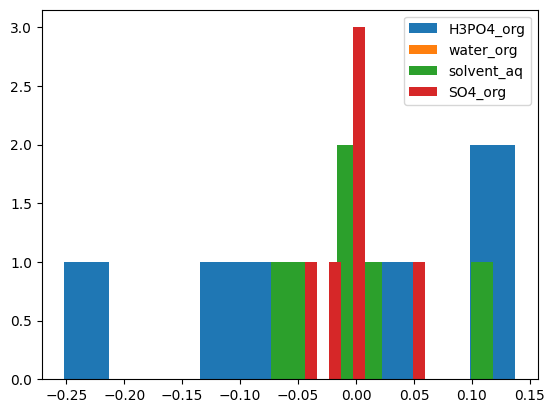

In [44]:
pred=predics2_01
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T2[:,0])/T2[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T2[:,1])/T2[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T2[:,2])/T2[:,2]*100
predics1_y4=pred[:,3]
error1_y4=(predics1_y4-T2[:,3])/T2[:,3]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.hist(error1_y4)

plt.legend(['H3PO4_org','water_org','solvent_aq','SO4_org'])
plt.show()

In [45]:
fig = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T2[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T2[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T2[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig.add_trace(go.Scatter(x=T2[:,3] , y=predics1_y4, mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig.add_trace(go.Scatter(x=T2[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,3] , y=error1_y3, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()

In [46]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

#### mesh

In [47]:
x_mesh, y_mesh = np.linspace(0, 50, 51), np.linspace(0, 0.15, 51)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh2 = x_mesh.flatten().reshape(51*51,1)
y_mesh2 = y_mesh.flatten().reshape(51*51,1)
mesh2_2=np.concatenate((x_mesh2, y_mesh2), axis=1)
# x_mesh[:5]

In [48]:
mesh_predics2_01=scaler_T2.inverse_transform(  bp2_01.run( scaler_X2.transform(mesh2_2) )  )

In [49]:
mesh_predics2_01

array([[-16.99129752,  12.4040406 ,   1.5227953 ,   0.09780696],
       [-16.4765317 ,  12.3188369 ,   1.52727516,   0.09718717],
       [-15.96176588,  12.23363321,   1.53175502,   0.09656737],
       ...,
       [  8.36672522,   8.54095758,   2.1772869 ,   0.0358565 ],
       [  9.15272068,   8.49071143,   2.12028386,   0.03400705],
       [  9.93871615,   8.44046529,   2.06328082,   0.03215759]])

In [50]:
fig_equil2_2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,1], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,2], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,3], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2_2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2_2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2_2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2_2.show()

### 4 together - 5 hidden

#### parameter searching

In [51]:
bp_iter=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-51-8a49181a082d>:16: RuntimeWarning:

invalid value encountered in scalar divide



80 81 82 83 84 85 86 87 88 89 

In [52]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
50          0.010           0.95                  0.0    0.001068   
52          0.010           0.95                  0.0    0.002175   
24          0.005           0.95                  0.0    0.004888   
22          0.005           0.95                  0.0    0.009605   
41          0.010           0.90                  0.0    0.013437   
..            ...            ...                  ...         ...   
8           0.005           0.80                  0.5    2.306925   
7           0.005           0.80                  0.5    2.409567   
5           0.005           0.80                  0.5    2.516386   
9           0.005           0.80                  0.5    3.044407   
6           0.005           0.80                  0.5    3.177846   

    relative_delta  
50       13.733046  
52        4.353131  
24       -0.847990  
22       -0.255461  
41        0.477994  
..             ...  
8        -0.010520  
7        -0.027503  
5        -0.024418  
9        -0.018263  
6        -0.015045  

[90 rows x 5 columns]

In [53]:
# weights_list[64]

In [54]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [55]:
bp_iter=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2, epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [56]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

#### best_weights_for_now

In [57]:
best_weights_for_now4=weights_lists2[0] # 5 hidden
best_weights_for_now4

[[[-0.008723440211847178,
   0.03744076749631245,
   -0.9029562467684856,
   -5.439140991574628,
   1.291580253804107],
  [-0.05333378274421238,
   1.6169675689643717,
   0.07537277119874584,
   -7.747608364228728,
   0.61598703710053]],
 [[-0.08378553856963404,
   -1.583843971587473,
   -4.915291096535328,
   -9.409487649023767,
   0.7652320691574351]],
 [[-0.0004993435170196611,
   0.1331691113488838,
   -0.13647580785767624,
   0.012137499092181652],
  [0.05220751460567039,
   0.14017321762492355,
   0.4030675250757065,
   -1.6693774837391417],
  [-2.633371547584962,
   3.8170524917427135,
   2.8407420476340106,
   -0.23573614566074086],
  [0.7391122465221358,
   -1.755782075989593,
   -2.266271930379601,
   2.8422541908787404],
  [1.4478432389827458,
   -1.343574966797799,
   -1.189345418587585,
   -1.557310525151867]],
 [[-1.1694886941129354,
   1.0356158583655293,
   0.8388229556183471,
   1.673433245983984]]]

In [58]:
manual_best_weights_for_now4=[[[-0.49713918706342886,
   0.1950284001898634,
   0.3000286638538871,
   2.942836725200948,
   -1.777182367796712],
  [2.1234531580838945,
   -0.5308939551421104,
   1.5451518611127595,
   -0.43183539769698653,
   -1.353510483105784]],
 [[-5.943166311786588,
   0.5436660955058797,
   -1.505456576119919,
   -2.9099233142370085,
   0.63874921575053]],
 [[0.6631567120354075,
   1.7152225538132848,
   -1.926593325437448,
   0.2593021750619779],
  [0.1590583031187942,
   -0.3475279357013146,
   -0.8488900298997195,
   -0.9144956943161578],
  [-0.7480193778822165,
   1.0922520235074942,
   0.6924882000692089,
   -1.9518238819373117],
  [1.4121712190765998,
   1.8210598982444497,
   -2.656747328453359,
   0.026146767983708605],
  [-1.091064184783977,
   1.3878567618032225,
   0.2004093181868182,
   0.9479273709076199]],
 [[0.5932312645572166,
   -0.9965956124325036,
   0.5675174709474265,
   0.34346613214124766]]]

 # 5 relu
 # epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0
 # loss = .0004

#### fitting best parameters

In [59]:
bp2_02=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')

In [60]:
# bp2_02.import_weights(best_weights_for_now4)
bp2_02.import_weights(manual_best_weights_for_now4)
bp2_02.fit(X_sc2, T_sc2, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [61]:
fig2_3=go.Figure()
fig2_3.add_trace(go.Scatter(y=bp2_02.loss_list[20:], name=''))
print('Initial loss =', bp2_02.loss_list[0])
print('Final loss =', bp2_02.loss_list[-1])
# fig2_3.show()

Initial loss = 0.003938660937267711
Final loss = 0.0029222844626381043


#### prediction

In [62]:
predics2_02=scaler_T2.inverse_transform(bp2_02.run(X_sc2))
predics2_02

array([[ 0.07186016,  9.60019325,  2.50007771,  0.06260343],
       [ 0.35986341,  9.49952372,  2.19986901,  0.08517122],
       [ 1.67506092,  9.3016696 ,  1.90064512,  0.07880041],
       [ 8.34483912,  8.49066676,  1.59487439,  0.06586401],
       [10.64537953,  8.5148219 ,  1.30864071,  0.06394605],
       [12.22430494,  8.69324198,  0.99602245,  0.0637174 ]])

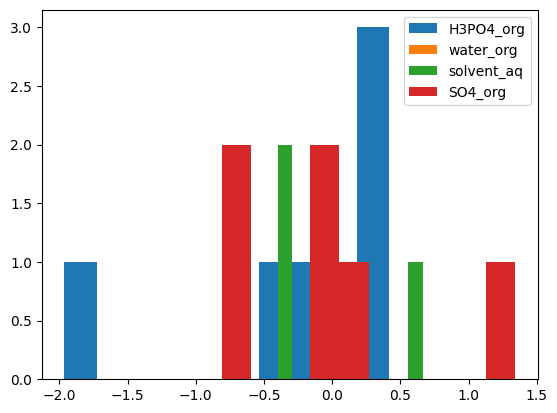

In [63]:
pred=predics2_02
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T2[:,0])/T2[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T2[:,1])/T2[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T2[:,2])/T2[:,2]*100
predics1_y4=pred[:,3]
error1_y4=(predics1_y4-T2[:,3])/T2[:,3]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.hist(error1_y4)

plt.legend(['H3PO4_org','water_org','solvent_aq','SO4_org'])
plt.show()

In [64]:
fig = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T2[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T2[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T2[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig.add_trace(go.Scatter(x=T2[:,3] , y=predics1_y4, mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig.add_trace(go.Scatter(x=T2[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,3] , y=error1_y3, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()

In [65]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

#### mesh

In [66]:
x_mesh, y_mesh = np.linspace(0, 50, 51), np.linspace(0, 0.15, 51)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh2 = x_mesh.flatten().reshape(51*51,1)
y_mesh2 = y_mesh.flatten().reshape(51*51,1)
mesh2_2=np.concatenate((x_mesh2, y_mesh2), axis=1)
# x_mesh[:5]

In [67]:
mesh_predics2_02=scaler_T2.inverse_transform(  bp2_02.run( scaler_X2.transform(mesh2_2) )  )

In [68]:
mesh_predics2_02

array([[-18.95883889,  11.72136432,   2.28440549,   0.10983304],
       [-18.39270372,  11.65418405,   2.26889551,   0.10890196],
       [-17.82656856,  11.58700377,   2.25338553,   0.10797088],
       ...,
       [  1.63832442,   9.48115456,   2.70013189,   0.04129478],
       [  1.57660418,   9.48978007,   2.70595791,   0.0410031 ],
       [  1.51488393,   9.49840557,   2.71178393,   0.04071141]])

In [69]:
fig_equil2_3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,1], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,2], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,3], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2_3.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2_3.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2_3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2_3.show()

### H3PO4_org

In [70]:
X2=np.array(data2)[:,[0,1]]
T2_1=np.array(data2)[:,[2]]

In [71]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_1 = preprocessing.StandardScaler().fit(T2_1)

scaler_data2_1 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_1.mean_, scaler_T2_1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_1[0], scaler_data2_1[1])
print('scaler T -- mean, stdev:  ',scaler_data2_1[2], scaler_data2_1[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_1 = scaler_T2_1.transform(T2_1)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667] [5.00466684]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

In [72]:
bp2_1=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [73]:
bp2_1.fit(X_sc2, T_sc2_1, epochs=1000, learning_rate = 0.01, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_1.loss_list[0])
print('Final loss =', bp2_1.loss_list[-1])

Initial loss = 1.0103687055599626
Final loss = 0.01618812237847177


In [74]:
bp2_1.export_weights()

[[[1.4712918727152045, -0.03955300250604385],
  [-0.9091377535050039, -0.0822925129019346]],
 [[0.29650050924825505, -0.0875834308155136]],
 [[0.8762371507280783], [0.008787672417510783]],
 [[-1.0606113354659614]]]

In [75]:
weights2_1=bp2_1.export_weights()

In [76]:
manual_weights2_1=[[[1.7891568738335732, -1.1785291564925502],
  [-0.504929133439221, -0.4385439629245994]],
 [[-1.2274800854986472, 1.060820499155897]],
 [[1.5766657992281017], [-0.4638647113832393]],
 [[-0.12921146069478243]]]

# 2 hidden prelu
# Final loss = 0.00023878868378339208

manual_weights2_12=[[[0.1735491429461148, 1.8140938189194906],
  [-0.6530409129171293, -0.6441814583921941]],
 [[0.7411897128053353, -1.2033881701371891]],
 [[0.3516552639162472], [1.6547118904069311]],
 [[-1.0860308848681413]]]

# 2 hidden prelu
# Final loss = 0.00014

In [77]:
# bp2_1.import_weights(weights2_1)
# bp2_1.import_weights(manual_weights2_1)
bp2_1.import_weights(manual_weights2_12)
predics2_1=scaler_T2_1.inverse_transform(bp2_1.run(X_sc2))

In [78]:
# predics2_1, T2_1

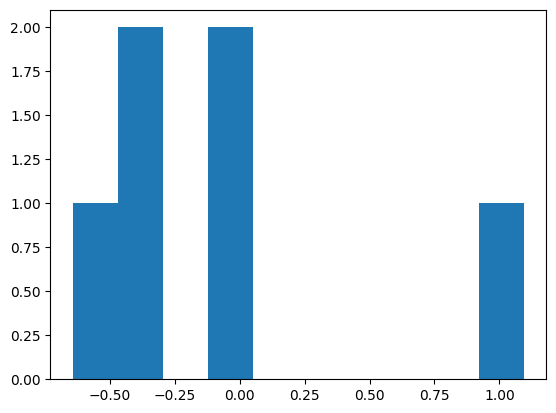

In [79]:
error2_1=(predics2_1[:,0]-T2_1[:,0])/T2_1[:,0]*100
plt.hist(error2_1)
plt.show()

In [80]:
mesh_predics2_1=scaler_T2_1.inverse_transform(  bp2_1.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_1

### water_org

In [81]:
X2=np.array(data2)[:,[0,1]]
T2_2=np.array(data2)[:,[3]]

In [82]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_2 = preprocessing.StandardScaler().fit(T2_2)

scaler_data2_2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_2.mean_, scaler_T2_2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_2[0], scaler_data2_2[1])
print('scaler T -- mean, stdev:  ',scaler_data2_2[2], scaler_data2_2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_2 = scaler_T2_2.transform(T2_2)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [9.01666667] [0.46338129]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

parameter searching

In [83]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [84]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
52          0.010           0.95                  0.0    0.007147   
82          0.050           0.95                  0.0    0.020708   
1           0.005           0.80                  0.0    0.025932   
32          0.010           0.80                  0.0    0.026006   
60          0.050           0.80                  0.0    0.026065   
..            ...            ...                  ...         ...   
37          0.010           0.80                  0.5    0.971725   
54          0.010           0.95                  0.0    0.999962   
77          0.050           0.90                  0.5    0.999996   
27          0.005           0.95                  0.5    1.000010   
7           0.005           0.80                  0.5    1.000294   

    relative_delta  
52   -4.194625e-02  
82    0.000000e+00  
1    -2.352297e-02  
32   -1.497932e-01  
60    4.226281e-01  
..             ...  
37   -2.900406e-03  
54   -1.140618e-05  
77   -2.486723e-08  
27   -4.818944e-09  
7    -1.663727e-05  

[90 rows x 5 columns]

In [85]:
weights_list[60]

[[[-1.4705789895510417, 0.5365958465161761],
  [-0.673184862546161, -0.24275920720551047]],
 [[0.6754003305139638, 0.002512319936769911]],
 [[1.2903975756378114], [0.03203207164780465]],
 [[-0.9795827477172355]]]

In [86]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [87]:
bp2_2=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [88]:
bp2_2.fit(X_sc2, T_sc2_2, epochs=1000, learning_rate = 0.005, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_2.loss_list[0])
print('Final loss =', bp2_2.loss_list[-1])

Initial loss = 1.0386285293705504
Final loss = 0.026088213737613653


In [89]:
bp2_2.export_weights()

[[[0.8161283200797991, -1.4812182921032002],
  [-0.3305218569303343, -0.6629113086516356]],
 [[0.057041569626236584, 0.701254923081162]],
 [[-0.09531763652305818], [1.1763874686625593]],
 [[-0.8584964159278605]]]

In [90]:
manual_weights2_2=[[[-2.3688210444515527, 2.098731394118159],
  [-1.1028505358197696, -4.289031245616676]],
 [[1.0951314669487642, -8.766706105459567]],
 [[0.7892953147766246], [-1.3482461942845092]],
 [[-0.9630528809172003]]]

# 2 hidden prelu
# Final loss = 0.026

manual_weights2_22=[[[-1.356083366626272, 2.1006456906712234],
  [-0.6309805208401018, -0.5374527149916659]],
 [[1.0515374304634164, -2.3182953246087115]],
 [[1.4841383017903245], [3.153523627853289]],
 [[-1.7074908699001965]]]

# 2 hidden prelu
# Final loss = 0.007

In [91]:
bp2_2.import_weights(manual_weights2_22)
predics2_2=scaler_T2_2.inverse_transform(bp2_2.run(X_sc2))

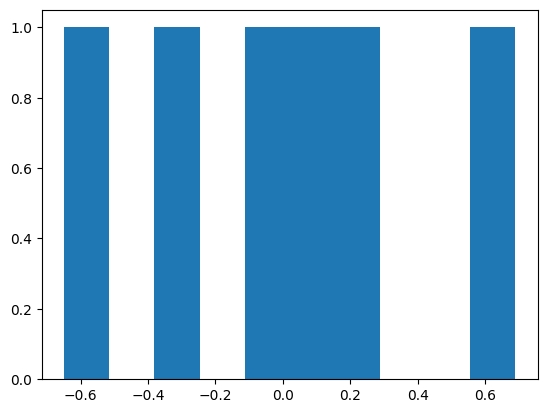

In [92]:
error2_2=(predics2_2[:,0]-T2_2[:,0])/T2_2[:,0]*100
plt.hist(error2_2)
plt.show()

In [93]:
mesh_predics2_2=scaler_T2_2.inverse_transform(  bp2_2.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_2

### solvent_aq

In [94]:
X2=np.array(data2)[:,[0,1]]
T2_3=np.array(data2)[:,[4]]

In [95]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_3 = preprocessing.StandardScaler().fit(T2_3)

scaler_data2_3 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_3.mean_, scaler_T2_3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_3[0], scaler_data2_3[1])
print('scaler T -- mean, stdev:  ',scaler_data2_3[2], scaler_data2_3[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_3 = scaler_T2_3.transform(T2_3)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [1.75] [0.51234754]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

parameter searching

In [96]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_3, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [97]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
60          0.050           0.80                  0.0    0.000002   
50          0.010           0.95                  0.0    0.000004   
53          0.010           0.95                  0.0    0.000029   
44          0.010           0.90                  0.0    0.000665   
72          0.050           0.90                  0.0    0.002878   
..            ...            ...                  ...         ...   
8           0.005           0.80                  0.5    0.961659   
38          0.010           0.80                  0.5    0.999988   
11          0.005           0.90                  0.0    0.999993   
49          0.010           0.90                  0.5    0.999994   
21          0.005           0.95                  0.0    0.999996   

    relative_delta  
60   -1.873000e-01  
50   -5.961231e-01  
53   -1.045474e+00  
44   -4.327345e-01  
72   -3.038822e-02  
..             ...  
8    -1.554020e-03  
38   -2.611188e-09  
11   -1.228588e-06  
49   -2.414962e-08  
21   -9.603415e-07  

[90 rows x 5 columns]

In [98]:
weights_list[70]

[[[1.2593846617789, -0.21608076500484785],
  [-1.013431696008409, -0.5669745299250459]],
 [[0.16698566429591455, 0.8278228220680255]],
 [[-0.6699737097447798], [-0.976164919702167]],
 [[1.5327970222413267]]]

In [99]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [100]:
bp2_3=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [101]:
bp2_3.fit(X_sc2, T_sc2_3, epochs=1000, learning_rate = 0.005, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_3.loss_list[0])
print('Final loss =', bp2_3.loss_list[-1])

Initial loss = 0.9970550627477325
Final loss = 0.07703555421129422


In [102]:
bp2_3.export_weights()

[[[0.00834464211100086, -1.3197805745137337],
  [-0.006541572049748025, -0.2548979322018524]],
 [[-0.15994093630967995, 1.3630823425503158]],
 [[-0.12238742033527772], [0.8908149284753323]],
 [[-1.21427367423679]]]

In [103]:
manual_weights2_3=[[[-1.0434539247186463, -0.840891516715229],
  [-0.22875054162539293, -0.12682741253900376]],
 [[1.1115656735349122, 0.7810694575866067]],
 [[0.6969716415327804], [0.5332714811363267]],
 [[-1.191251818678171]]]

# 2 hidden prelu
# Final loss = 0.077

manual_weights2_32=[[[2.0994823528593702, -1.2293957752203057],
  [-0.6972915446623457, 0.5216771334283966]],
 [[-2.3459563115354527, 1.775004898861346]],
 [[-3.1726827033207408], [0.4025651395234753]],
 [[-0.4638947231253712]]]

# 2 hidden prelu
# Final loss = 0

In [104]:
bp2_3.import_weights(manual_weights2_32)
predics2_3=scaler_T2_3.inverse_transform(bp2_3.run(X_sc2))

In [105]:
predics2_3[:,0]

array([2.49957267, 2.2011776 , 1.89891732, 1.60033243, 1.29999965,
       1.00000033])

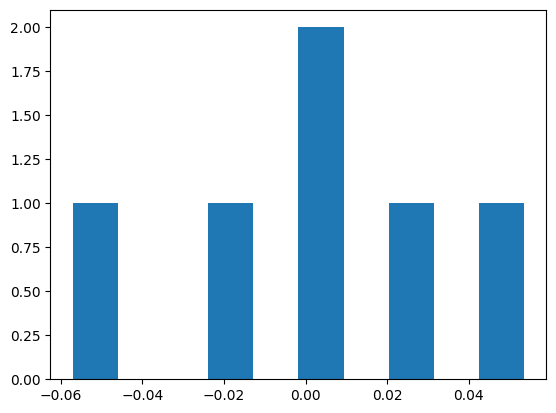

In [106]:
error2_3=(predics2_3[:,0]-T2_3[:,0])/T2_3[:,0]*100
plt.hist(error2_3)
plt.show()

In [107]:
mesh_predics2_3=scaler_T2_3.inverse_transform(  bp2_3.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_3

### SO4_org

In [108]:
X2=np.array(data2)[:,[0,1]]
T2_4=np.array(data2)[:,[5]]

In [109]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_4 = preprocessing.StandardScaler().fit(T2_4)

scaler_data2_4 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_4.mean_, scaler_T2_4.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_4[0], scaler_data2_4[1])
print('scaler T -- mean, stdev:  ',scaler_data2_4[2], scaler_data2_4[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_4 = scaler_T2_4.transform(T2_4)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [0.07001667] [0.00872609]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

parameter searching

In [110]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.9, 0.95, 0.98]
learning_rate_decay = [0, 0.5]
repeats = range(10)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_4, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 180
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 

126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-110-6c9d1525e5ca>:16: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-110-6c9d1525e5ca>:16: RuntimeWarning:

invalid value encountered in scalar subtract



147 148 149 150 

151 152 153 154 155 156 157 158 159 160 161 162 163 164 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:447: RuntimeWarning:

overflow encountered in matmul



165 166 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:391: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:391: RuntimeWarning:

invalid value encountered in add



167 168 169 170 171 172 173 174 175 

176 177 178 179 

In [111]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
20           0.005           0.95                  0.0    0.004015   
146          0.050           0.95                  0.0    0.004015   
68           0.010           0.90                  0.0    0.004015   
29           0.005           0.95                  0.0    0.004015   
43           0.005           0.98                  0.0    0.004015   
..             ...            ...                  ...         ...   
166          0.050           0.98                  0.0    1.100000   
165          0.050           0.98                  0.0    1.100000   
160          0.050           0.98                  0.0    1.100000   
147          0.050           0.95                  0.0    1.100000   
169          0.050           0.98                  0.0    1.100000   

     relative_delta  
20     3.672179e-13  
146   -2.808137e-13  
68     6.480315e-14  
29     1.533675e-12  
43     4.516994e-06  
..              ...  
166    1.100000e+00  
165    1.100000e+00  
160    1.100000e+00  
147    1.100000e+00  
169    1.100000e+00  

[180 rows x 5 columns]

In [112]:
weights_list[108]

[[[1.6053643694213637, 0.2362679724012692],
  [0.777236560623538, -0.30507815338993854]],
 [[0.19305322638366376, -0.4586368600389697]],
 [[-1.1850263712949318], [0.5690870271949894]],
 [[0.628216671618514]]]

In [113]:
weights2_4=weights_list[108]

In [114]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

running best parameters

In [115]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 30
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2_4, epochs=3000, learning_rate = 0.05, momentum_term = 0.98, learning_rate_decay = 0.3, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [116]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

In [117]:
best_weights_for_now2_4=weights_lists2[13]
best_weights_for_now2_4

[[[0.520297620035558, 0.21004509981554584],
  [1.9817905500496187, -0.04601338041974724]],
 [[-2.4168958232670015, -0.8756246492175626]],
 [[-1.708983843232662], [-2.228520907463434]],
 [[0.16273754125136353]]]

In [118]:
bp2_4=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [119]:
# bp2_4.export_weights()

In [120]:
manual_weights2_4=[[[-0.16700158966413353, 1.1770332498659186],
  [1.4526084685823955, -0.9137197260973858]],
 [[-0.7468444598517179, 1.2452474051184519]],
 [[-1.3107172968906877], [-0.9375882900282885]],
 [[2.199196282499367]]]

# 2 hidden prelu
# Final loss = 0.1

manual_weights2_42=[[[-0.03998713454920765, -1.296313464466576],
  [1.3133609043926477, -0.5524389024009899]],
 [[-0.8849418689452931, 0.7889879563287986]],
 [[-1.576332174028801], [1.4492604070808766]],
 [[-0.7102506948766614]]]

# 2 hidden prelu
# Final loss = 0.002

manual_weights2_43=[[[-2.7308241499437758, 1.8373933992350313],
  [-2.021898044039464, -0.8845457922101067]],
 [[1.0694417308325381, 0.08920200363835196]],
 [[2.7835653102552724], [1.6175935763910405]],
 [[-4.969235753353272]]]
# 2 hidden prelu
# Final loss = 0.0008

In [121]:
bp2_4.import_weights(manual_weights2_43)
# bp2_4.import_weights(best_weights_for_now2_4)
# bp2_4.import_weights(weights2_4)
predics2_4=scaler_T2_4.inverse_transform(bp2_4.run(X_sc2))

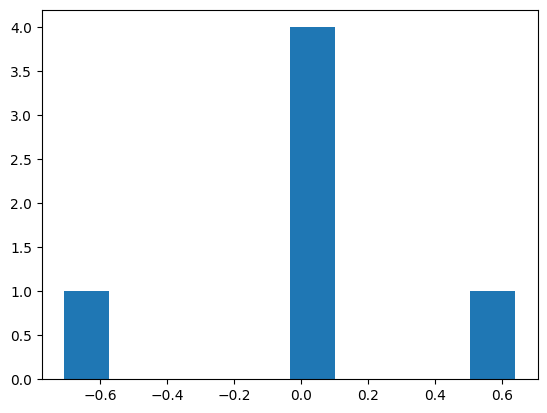

In [122]:
error2_4=(predics2_4[:,0]-T2_4[:,0])/T2_4[:,0]*100
plt.hist(error2_4)
plt.show()

In [123]:
mesh_predics2_4=scaler_T2_4.inverse_transform(  bp2_4.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_4

## Vizualization

In [124]:
fig_equil2_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil2_err.add_trace(go.Scatter(x=T2[:,0] , y=predics2_1[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,1] , y=predics2_2[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,2] , y=predics2_3[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,3] , y=predics2_4[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil2_err.add_trace(go.Scatter(x=T2[:,0] , y=error2_1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,1] , y=error2_2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,2] , y=error2_3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,3] , y=error2_4, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil2_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil2_err.show()

In [125]:
fig_equil2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_1[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_2[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_3[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_4[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

fig_equil2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))

fig_equil2.show()

In [126]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

## output

In [127]:
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667 9.01666667 1.75       0.07001667] [5.00466684 0.46338129 0.51234754 0.00872609]


In [128]:
# H3PO4_org
bp2_1.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.1735491429461148, 1.8140938189194906], [-0.6530409129171293, -0.6441814583921941]]
Hidden layer biases:  [[0.7411897128053353, -1.2033881701371891]]
Outlet layer weights:  [[0.3516552639162472], [1.6547118904069311]]
Outlet layer biases:  [[-1.0860308848681413]]


In [129]:
bp2_1.export_weights()

[[[0.1735491429461148, 1.8140938189194906],
  [-0.6530409129171293, -0.6441814583921941]],
 [[0.7411897128053353, -1.2033881701371891]],
 [[0.3516552639162472], [1.6547118904069311]],
 [[-1.0860308848681413]]]

In [130]:
print('scaler T -- mean, stdev:  ',scaler_data2_1[2], scaler_data2_1[3])

scaler T -- mean, stdev:   [5.55371667] [5.00466684]


In [131]:
# water_org
bp2_2.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-1.356083366626272, 2.1006456906712234], [-0.6309805208401018, -0.5374527149916659]]
Hidden layer biases:  [[1.0515374304634164, -2.3182953246087115]]
Outlet layer weights:  [[1.4841383017903245], [3.153523627853289]]
Outlet layer biases:  [[-1.7074908699001965]]


In [132]:
bp2_2.export_weights()

[[[-1.356083366626272, 2.1006456906712234],
  [-0.6309805208401018, -0.5374527149916659]],
 [[1.0515374304634164, -2.3182953246087115]],
 [[1.4841383017903245], [3.153523627853289]],
 [[-1.7074908699001965]]]

In [133]:
# solvent_aq
bp2_3.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[2.0994823528593702, -1.2293957752203057], [-0.6972915446623457, 0.5216771334283966]]
Hidden layer biases:  [[-2.3459563115354527, 1.775004898861346]]
Outlet layer weights:  [[-3.1726827033207408], [0.4025651395234753]]
Outlet layer biases:  [[-0.4638947231253712]]


In [134]:
bp2_3.export_weights()

[[[2.0994823528593702, -1.2293957752203057],
  [-0.6972915446623457, 0.5216771334283966]],
 [[-2.3459563115354527, 1.775004898861346]],
 [[-3.1726827033207408], [0.4025651395234753]],
 [[-0.4638947231253712]]]

In [135]:
# SO4_org
bp2_4.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-2.7308241499437758, 1.8373933992350313], [-2.021898044039464, -0.8845457922101067]]
Hidden layer biases:  [[1.0694417308325381, 0.08920200363835196]]
Outlet layer weights:  [[2.7835653102552724], [1.6175935763910405]]
Outlet layer biases:  [[-4.969235753353272]]


In [136]:
bp2_4.export_weights()

[[[-2.7308241499437758, 1.8373933992350313],
  [-2.021898044039464, -0.8845457922101067]],
 [[1.0694417308325381, 0.08920200363835196]],
 [[2.7835653102552724], [1.6175935763910405]],
 [[-4.969235753353272]]]

# 3 - EQUIL_rotem_washing3
ניסויי הפרדה עם ממס מטוהר

In [137]:
# נתוני פרופיל
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	H3PO4_org	water_org	solvent_aq	SO4_org
4.15	0.1470	0.073	9.6	2.5	0.0626
14.9	0.0806	0.36	9.5	2.2	0.0852
28.6	0.0329	1.68	9.3	1.9	0.0787
45.7	0.0106	8.31	8.5	1.6	0.0664
48.2	0.0078	10.7	8.5	1.3	0.0631
49.4	0.0058	12.2	8.7	1.0	0.0641
''')
# data
# data2=pd.DataFrame(data, columns=['H3PO4_aq',	'SO4_aq',	'H3PO4_org',	'water_org',	'solvent_aq',	'SO4_org'])
data_profile=pd.DataFrame(data[1:], columns=data[0])
data_profile_names=CopyPasteToArray('''
571	573	575	579	581	5150
''')
# data_profile

In [138]:
# נתוני ניסויי הפרדה
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	H3PO4_org	water_org	solvent_aq	SO4_org	water_org-original
0.011	0.0932	0.072	8.69	1.70	0.0186	12.09
10.325	0.0017	0.229	10.66	1.52	0.02	10.66
10.380	0.0990	0.269	8.31	1.50	0.0208	10.41
19.821	0.0031	0.635	11.3	1.34	0.01884	11.3
19.710	0.0928	0.773	10.36	1.32	0.0195	12.34
28.710	0.0057	1.435	11.96	1.28	0.01978	11.96
27.882	0.0858	1.325	9.7	1.34	0.0222	11.1
35.611	0.0071	2.871	11.94	1.28	0.036	11.94
35.887	0.0846	2.981	12.02	1.24	0.0374	12.6
43.065	0.0082	5.328	12.12	1.28	0.057	12.12
43.065	0.0802	5.604	10.38	1.06	0.0608	11.7
49.966	0.0074	8.723	12.28	1.28	0.0872	12.28
0.017	0.1540	0.042	11.48	1.46	0.0164	13.28
4.831	0.0020	0.146	12.7	1.78	0.01302	12.6
4.941	0.1078	0.173	12.06	1.66	0.0139	11.84
19.600	0.0033	0.828	11.84	1.38	0.01688	11.42
19.766	0.1120	0.856	12.46	1.38	0.01832	11.2
''')
# data
# data2=pd.DataFrame(data, columns=['H3PO4_aq',	'SO4_aq',	'H3PO4_org',	'water_org',	'solvent_aq',	'SO4_org'])
data3=pd.DataFrame(data[1:], columns=data[0])
data3_names=CopyPasteToArray('''
wp12	wp21	wp22	wp31	wp32	wp41	wp42	wp51	wp52	wp61	wp62	wp71	wp13	ww11	ww12	ww21	ww22
''')
data3

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org  \
0      0.011  0.0932      0.072       8.69        1.70  0.01860   
1     10.325  0.0017      0.229      10.66        1.52  0.02000   
2     10.380  0.0990      0.269       8.31        1.50  0.02080   
3     19.821  0.0031      0.635      11.30        1.34  0.01884   
4     19.710  0.0928      0.773      10.36        1.32  0.01950   
5     28.710  0.0057      1.435      11.96        1.28  0.01978   
6     27.882  0.0858      1.325       9.70        1.34  0.02220   
7     35.611  0.0071      2.871      11.94        1.28  0.03600   
8     35.887  0.0846      2.981      12.02        1.24  0.03740   
9     43.065  0.0082      5.328      12.12        1.28  0.05700   
10    43.065  0.0802      5.604      10.38        1.06  0.06080   
11    49.966  0.0074      8.723      12.28        1.28  0.08720   
12     0.017  0.1540      0.042      11.48        1.46  0.01640   
13     4.831  0.0020      0.146      12.70        1.78  0.01302   
14     4.941  0.1078      0.173      12.06        1.66  0.01390   
15    19.600  0.0033      0.828      11.84        1.38  0.01688   
16    19.766  0.1120      0.856      12.46        1.38  0.01832   

    water_org-original  
0                12.09  
1                10.66  
2                10.41  
3                11.30  
4                12.34  
5                11.96  
6                11.10  
7                11.94  
8                12.60  
9                12.12  
10               11.70  
11               12.28  
12               13.28  
13               12.60  
14               11.84  
15               11.42  
16               11.20

In [139]:
fig_equil3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])
plot_data=data3[:13].copy()
text_data=data3_names[0][:13]
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='H3PO4_org-purified', text=text_data), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='blue', marker_symbol='circle', mode='markers', name='water_org-purified', text=text_data), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker_color='blue', marker_symbol='circle', mode='markers', name='solvent_aq-purified', text=text_data), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='SO4_org-purified', text=text_data), 2, 2)

plot_data=data3[13:].copy()
text_data=data3_names[0][13:]
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='H3PO4_org-washed', text=text_data), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='water_org-washed', text=text_data), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='solvent_aq-washed', text=text_data), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='SO4_org-washed', text=text_data), 2, 2)

plot_data=data_profile.copy()
text_data=data_profile_names[0]
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker={'color':'blue', 'symbol':'x', 'size':3}, mode='markers', name='H3PO4_org-profile', text=text_data, visible='legendonly'), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker={'color':'blue', 'symbol':'x', 'size':3}, mode='markers', name='water_org-profile', text=text_data, visible='legendonly'), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker={'color':'blue', 'symbol':'x', 'size':3}, mode='markers', name='solvent_aq-profile', text=text_data, visible='legendonly'), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker={'color':'blue', 'symbol':'x', 'size':3}, mode='markers', name='SO4_org-profile', text=text_data, visible='legendonly'), 2, 2)

fig_equil3.update_layout(title='', autosize=True,
                  width=810, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),

                  )

fig_equil3.update_layout(
    scene1_zaxis_range=[0,10],
    scene2_zaxis_range=[8,14],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

# fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))
fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-0.0001, y=-1.5, z=-0.0001))
fig_equil3.update_scenes(camera_projection_type="orthographic")
# fig_equil3.write_html("IAmOH equilibrium experim data 130823.html")

fig_equil3.show()

In [140]:
fig_equil3_water = go.Figure()
plot_data=data3[:13].copy()
text_data=data3_names[0][:13]
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='blue', marker_symbol='circle', mode='markers', name='water_org-purified-retested', text=text_data))
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data['water_org-original'], marker_color='red', marker_symbol='circle', mode='markers', name='water_org-purified-original', text=text_data))

plot_data=data3[13:].copy()
text_data=data3_names[0][13:]
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='water_org-washed-retested', text=text_data))
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data['water_org-original'], marker={'color':'red', 'symbol':'diamond', 'size':6}, mode='markers', name='water_org-washed-original', text=text_data))

fig_equil3_water.update_layout(title='', autosize=True,
                  # width=810, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  scene=dict(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq',
                             camera_eye=dict(x=-0.0001, y=-2.5, z=-0.0001),
                            #  camera_projection_type="orthographic",
                             ),
                  )

# fig_equil3_water.write_html("IAmOH equilibrium experim data water 130823.html")

fig_equil3_water.show()

In [141]:
# x_mesh, y_mesh = np.linspace(0, 60, 31), np.linspace(0, 0.2, 31) # expanded x and y extrapolation area observation
x_mesh, y_mesh = np.linspace(-10, 70, 31), np.linspace(-0.1, 0.35, 31) # more expanded x and y extrapolation area observation
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh3 = x_mesh.flatten().reshape(31*31,1)
y_mesh3 = y_mesh.flatten().reshape(31*31,1)
mesh3=np.concatenate((x_mesh3, y_mesh3), axis=1)
# x_mesh[:5]

In [142]:
X3=np.array(data3)[:,[0,1]]
T3=np.array(data3)[:,[2,3,4,5]]

In [143]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3 = preprocessing.StandardScaler().fit(T3)

scaler_data3 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3.mean_, scaler_T3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3[0], scaler_data3[1])
print('scaler T -- mean, stdev:  ',scaler_data3[2], scaler_data3[3])

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [ 1.89941176 11.19176471  1.4         0.02921412] [2.40216868 1.27085536 0.17875386 0.01997862]


## H3PO4_org

In [144]:
X3=np.array(data3)[:,[0,1]]
T3_1=np.array(data3)[:,[2]]

In [145]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_1 = preprocessing.StandardScaler().fit(T3_1)

scaler_data3_1 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_1.mean_, scaler_T3_1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_1[0], scaler_data3_1[1])
print('scaler T -- mean, stdev:  ',scaler_data3_1[2], scaler_data3_1[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_1 = scaler_T3_1.transform(T3_1)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [1.89941176] [2.40216868]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [146]:
bp3_1=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.0138181745623487
Final loss = 0.025159559039233653


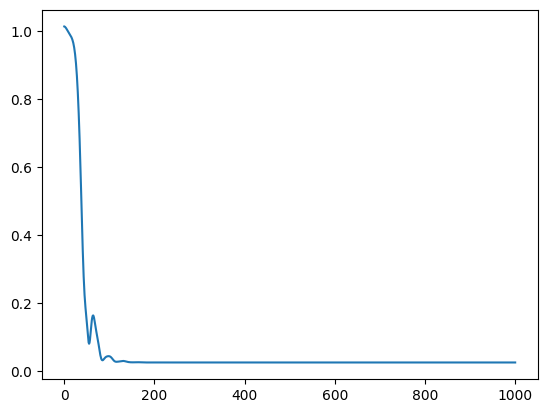

In [147]:
bp3_1.fit(X_sc3, T_sc3_1, epochs=1000, learning_rate = 0.001, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp3_1.loss_list[0])
print('Final loss =', bp3_1.loss_list[-1])
plt.plot(bp3_1.loss_list)

In [148]:
bp3_1.export_weights()

[[[1.1385185504986741, 0.9923295342579337],
  [-0.03593465428036884, 0.016465813975058762]],
 [[-0.33580146555328105, -0.299876970417045]],
 [[1.0300296204574872], [0.885537582726041]],
 [[-0.6211359321341346]]]

In [149]:
weights3_1=bp3_1.export_weights()

In [150]:
manual_weights3_1=[[[-0.2328053114817587, 1.4197258515721494],
  [-0.013739923476318716, -0.009509632921841494]],
 [[1.5848282259786703, -0.9625030403646567]],
 [[-1.3007118041663503], [1.5725920350068667]],
 [[1.717]]] # manual correction by 0.12 to make positive at (0,0). delta=0.12/2.4=0.05.  Original: 1.6673341551414473

# 2 hidden prelu
# Final loss = 0.042

In [151]:
# bp3_1.import_weights(weights3_1)
bp3_1.import_weights(manual_weights3_1)
predics3_1=scaler_T3_1.inverse_transform(bp3_1.run(X_sc3))

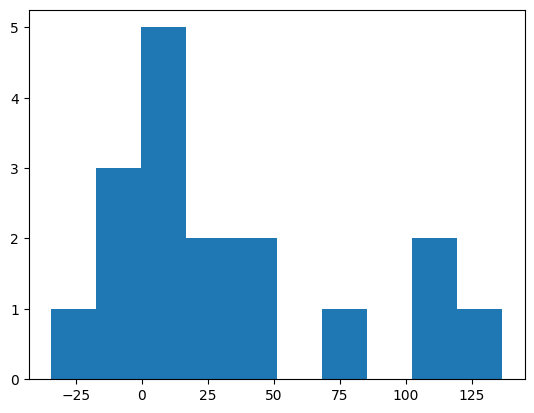

In [152]:
error3_1=(predics3_1[:,0]-T3_1[:,0])/T3_1[:,0]*100
plt.hist(error3_1)
plt.show()

In [153]:
mesh_predics3_1=scaler_T3_1.inverse_transform(  bp3_1.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_1

## water_org

In [154]:
X3_2=np.array(data3)[:12,[0,1]]
T3_2=np.array(data3)[:12,[3]]

In [155]:
# X3_2

In [156]:
scaler_X3_2 = preprocessing.StandardScaler().fit(X3_2)
scaler_T3_2 = preprocessing.StandardScaler().fit(T3_2)

scaler_data3_2 = [scaler_X3_2.mean_, scaler_X3_2.scale_, scaler_T3_2.mean_, scaler_T3_2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_2[0], scaler_data3_2[1])
print('scaler T -- mean, stdev:  ',scaler_data3_2[2], scaler_data3_2[3])

X_sc3_2 = scaler_X3_2.transform(X3_2)
T_sc3_2 = scaler_T3_2.transform(T3_2)
X_sc3_2[0:3]

scaler X -- mean, stdev:   [27.03608333  0.0474    ] [14.68499343  0.04213688]
scaler T -- mean, stdev:   [10.81] [1.3091664]


array([[-1.84031974,  1.08693382],
       [-1.13797009, -1.0845606 ],
       [-1.13422477,  1.22458046]])

In [157]:
bp3_2=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.006811822719811
Final loss = 0.19723831085641397


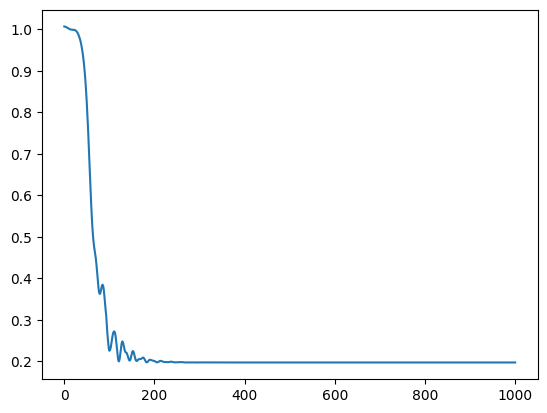

In [158]:
bp3_2.fit(X_sc3_2, T_sc3_2, epochs=1000, learning_rate = 0.001, momentum_term = 0.97, learning_rate_decay = 0)
print('Initial loss =', bp3_2.loss_list[0])
print('Final loss =', bp3_2.loss_list[-1])
plt.plot(bp3_2.loss_list)

In [159]:
bp3_2.export_weights()

[[[0.5097592769015342, 0.007438794127738573],
  [-0.4850367263646947, 0.0308818813101496]],
 [[1.7020559739548884, -0.04067348478648909]],
 [[1.1059892041991977], [-0.057085876897789975]],
 [[-1.8824581837244583]]]

In [160]:
weights3_2=bp3_2.export_weights()

In [161]:
manual_weights3_2=[[[0.3909002105371126, -0.8406267181665068],
  [-0.4530958444599508, 0.704664998208326]],
 [[-0.09671769242746425, 0.7927475123043677]],
 [[0.48441213405704675], [-0.7676170242577324]],
 [[0.6435152247205708]]]

# 2 hidden prelu
# Final loss = 0.18
# Good data only

In [162]:
# bp3_2.import_weights(weights3_2)
bp3_2.import_weights(manual_weights3_2)
predics3_2=scaler_T3_2.inverse_transform(bp3_2.run(X_sc3_2))

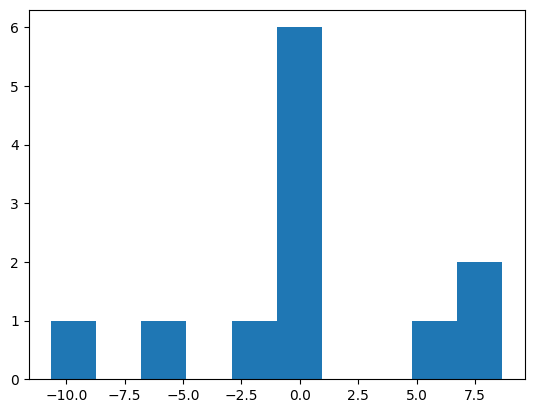

In [163]:
error3_2=(predics3_2[:,0]-T3_2[:,0])/T3_2[:,0]*100
plt.hist(error3_2)
plt.show()

In [164]:
mesh_predics3_2=scaler_T3_2.inverse_transform(  bp3_2.run( scaler_X3_2.transform(mesh3) )  )
# mesh_predics3_2

## solvent_aq

In [165]:
X3=np.array(data3)[:,[0,1]]
T3_3=np.array(data3)[:,[4]]

In [166]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_3 = preprocessing.StandardScaler().fit(T3_3)

scaler_data3_3 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_3.mean_, scaler_T3_3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_3[0], scaler_data3_3[1])
print('scaler T -- mean, stdev:  ',scaler_data3_3[2], scaler_data3_3[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_3 = scaler_T3_3.transform(T3_3)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [1.4] [0.17875386]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [167]:
bp3_3=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.04095298008008
Final loss = 0.21436423702733443


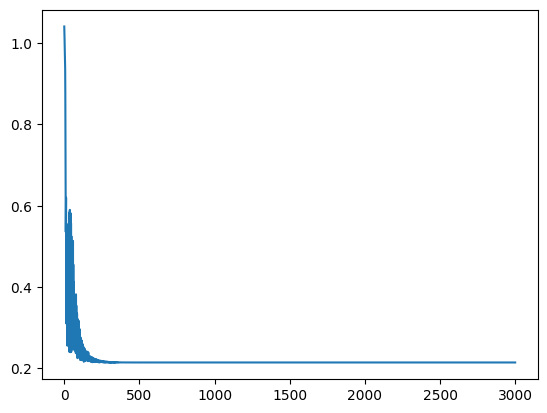

In [168]:
bp3_3.fit(X_sc3, T_sc3_3, epochs=3000, learning_rate = 0.01, momentum_term = 0.98, learning_rate_decay = 0)
print('Initial loss =', bp3_3.loss_list[0])
print('Final loss =', bp3_3.loss_list[-1])
plt.plot(bp3_3.loss_list)

In [169]:
bp3_3.export_weights()

[[[0.42819292737971526, 0.9583789524191373],
  [1.9349227774844964, 0.17312712822631052]],
 [[-2.516301132645552, 1.6347814712620634]],
 [[-1.2023304147191975], [-1.0164279411339059]],
 [[1.7034535342141637]]]

In [170]:
weights3_3=bp3_3.export_weights()

In [171]:
manual_weights3_3=[[[0.6217022345240342, 2.8386999598609814],
  [-0.6968938452576019, 5.596033242601742]],
 [[2.7109590937198265, 0.22193377952697202]],
 [[-0.9372090292368469], [-0.33293100862641933]],
 [[3.277263990359097]]]

# 2 hidden prelu
# Final loss = 0.198

In [172]:
manual_weights3_3_2=[[[-7.637254337641781, -0.490322880885377],
  [-1.8058063735873857, -0.10159866035465558]],
 [[-0.843126492292387, -2.3299686091075773]],
 [[0.2643116291427324], [0.4479958576488306]],
 [[-0.7056420231884761]]]

# 2 hidden prelu # horizontal on highs
# Final loss = 0.093

In [173]:
bp3_3.import_weights(weights3_3)
bp3_3.import_weights(manual_weights3_3_2)
# bp3_3.import_weights(manual_weights3_3)
predics3_3=scaler_T3_3.inverse_transform(bp3_3.run(X_sc3))

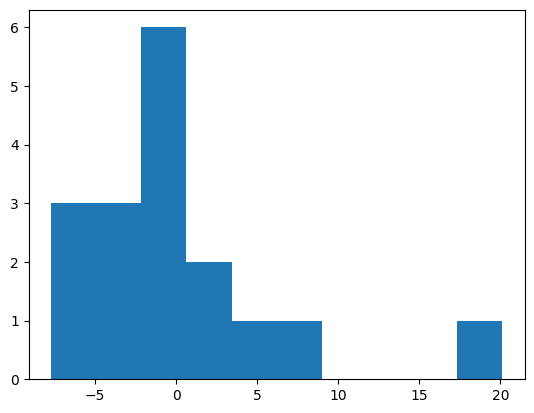

In [174]:
error3_3=(predics3_3[:,0]-T3_3[:,0])/T3_3[:,0]*100
plt.hist(error3_3)
plt.show()

In [175]:
mesh_predics3_3=scaler_T3_3.inverse_transform(  bp3_3.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_3

## SO4_org

In [176]:
X3=np.array(data3)[:,[0,1]]
T3_4=np.array(data3)[:,[5]]

In [177]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_4 = preprocessing.StandardScaler().fit(T3_4)

scaler_data3_4 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_4.mean_, scaler_T3_4.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_4[0], scaler_data3_4[1])
print('scaler T -- mean, stdev:  ',scaler_data3_4[2], scaler_data3_4[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_4 = scaler_T3_4.transform(T3_4)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [0.02921412] [0.01997862]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [178]:
bp3_4=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 0.990999952471534
Final loss = 0.015101863931885532


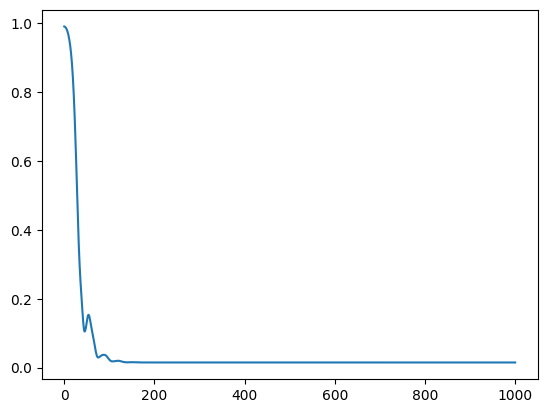

In [179]:
bp3_4.fit(X_sc3, T_sc3_4, epochs=1000, learning_rate = 0.001, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp3_4.loss_list[0])
print('Final loss =', bp3_4.loss_list[-1])
plt.plot(bp3_4.loss_list)

In [180]:
bp3_4.export_weights()

[[[0.05494419215693417, 1.6710217177572966],
  [0.04903427039751993, 0.02009194846192285]],
 [[-0.15570405772433438, -0.9600093215852614]],
 [[0.024655341239132184], [1.6025544782949093]],
 [[-0.5489979119663395]]]

In [181]:
weights3_4=bp3_4.export_weights()

In [182]:
manual_weights3_4=[[[-0.10168260750729177, 1.5507975795954547],
  [-0.02429351337425621, -5.794943503077378e-05]],
 [[1.5556257229985646, -0.978368082003519]],
 [[-1.3219817921544152], [1.6394490601340548]],
 [[1.5742747334295601]]]
# 2 hidden prelu
# Final loss = 0.011

In [183]:
# bp3_4.import_weights(weights3_4)
bp3_4.import_weights(manual_weights3_4)
predics3_4=scaler_T3_4.inverse_transform(bp3_4.run(X_sc3))

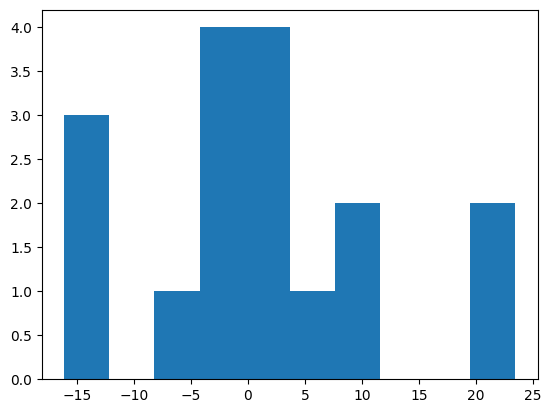

In [184]:
error3_4=(predics3_4[:,0]-T3_4[:,0])/T3_4[:,0]*100
plt.hist(error3_4)
plt.show()

In [185]:
mesh_predics3_4=scaler_T3_4.inverse_transform(  bp3_4.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_4

## Vizualization

In [186]:
fig_equil3_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil3_err.add_trace(go.Scatter(x=T3[:,0] , y=predics3_1[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,1] , y=predics3_2[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,2] , y=predics3_3[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,3] , y=predics3_4[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil3_err.add_trace(go.Scatter(x=T3[:,0] , y=error3_1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,1] , y=error3_2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,2] , y=error3_3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,3] , y=error3_4, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil3_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil3_err.show()

In [187]:
fig_equil3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.SO4_org, mode='markers', name='SO4_org'), 2, 2)

# visib='legendonly'
visib=True

fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_1[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,1)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_2[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,2)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_3[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,1)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_4[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,2)

fig_equil3.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil3.update_layout(
    scene1_zaxis_range=[0,10],
    scene2_zaxis_range=[8,14],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

# fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))
fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=0, y=-2.2, z=0))
# fig_equil3.update_scenes(camera_projection_type="orthographic")
# fig_equil3.write_html("IAmOH equilibrium experim data with models 130823.html")

fig_equil3.show()

## output

In [188]:
# H3PO4_org
bp3_1.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-0.2328053114817587, 1.4197258515721494], [-0.013739923476318716, -0.009509632921841494]]
Hidden layer biases:  [[1.5848282259786703, -0.9625030403646567]]
Outlet layer weights:  [[-1.3007118041663503], [1.5725920350068667]]
Outlet layer biases:  [[1.717]]


In [189]:
bp3_1.export_weights()

[[[-0.2328053114817587, 1.4197258515721494],
  [-0.013739923476318716, -0.009509632921841494]],
 [[1.5848282259786703, -0.9625030403646567]],
 [[-1.3007118041663503], [1.5725920350068667]],
 [[1.717]]]

In [190]:
# water_org
bp3_2.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.3909002105371126, -0.8406267181665068], [-0.4530958444599508, 0.704664998208326]]
Hidden layer biases:  [[-0.09671769242746425, 0.7927475123043677]]
Outlet layer weights:  [[0.48441213405704675], [-0.7676170242577324]]
Outlet layer biases:  [[0.6435152247205708]]


In [191]:
bp3_2.export_weights()

[[[0.3909002105371126, -0.8406267181665068],
  [-0.4530958444599508, 0.704664998208326]],
 [[-0.09671769242746425, 0.7927475123043677]],
 [[0.48441213405704675], [-0.7676170242577324]],
 [[0.6435152247205708]]]

In [192]:
# solvent_aq
bp3_3.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-7.637254337641781, -0.490322880885377], [-1.8058063735873857, -0.10159866035465558]]
Hidden layer biases:  [[-0.843126492292387, -2.3299686091075773]]
Outlet layer weights:  [[0.2643116291427324], [0.4479958576488306]]
Outlet layer biases:  [[-0.7056420231884761]]


In [193]:
bp3_3.export_weights()

[[[-7.637254337641781, -0.490322880885377],
  [-1.8058063735873857, -0.10159866035465558]],
 [[-0.843126492292387, -2.3299686091075773]],
 [[0.2643116291427324], [0.4479958576488306]],
 [[-0.7056420231884761]]]

In [194]:
# SO4_org
bp3_4.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-0.10168260750729177, 1.5507975795954547], [-0.02429351337425621, -5.794943503077378e-05]]
Hidden layer biases:  [[1.5556257229985646, -0.978368082003519]]
Outlet layer weights:  [[-1.3219817921544152], [1.6394490601340548]]
Outlet layer biases:  [[1.5742747334295601]]


In [195]:
bp3_4.export_weights()

[[[-0.10168260750729177, 1.5507975795954547],
  [-0.02429351337425621, -5.794943503077378e-05]],
 [[1.5556257229985646, -0.978368082003519]],
 [[-1.3219817921544152], [1.6394490601340548]],
 [[1.5742747334295601]]]

# 4 - YPH_pur_1

In [196]:
df=CopyPasteToArray('''
Fe_aq	1/D
0.00840	116.7
0.00320	69.6
0.00470	72.3
0.00906	60.4
0.00541	43.3
0.00400	43.3
''')
df=pd.DataFrame(df[1:], columns=df[0])
df['label']=CopyPasteToArray('''
28th	28th	28th	7th	7th	7th
''')[0]
data4=df
data4

Fe_aq    1/D label
0  0.00840  116.7  28th
1  0.00320   69.6  28th
2  0.00470   72.3  28th
3  0.00906   60.4   7th
4  0.00541   43.3   7th
5  0.00400   43.3   7th

In [197]:
X4=np.array(data4)[:,[0]]
T4=np.array(data4)[:,[1]]

In [198]:
scaler_X4 = preprocessing.StandardScaler().fit(X4)
scaler_T4 = preprocessing.StandardScaler().fit(T4)

# scaler_X4.mean_, scaler_X4.scale_ = 0, 1 # disable scaling
# scaler_T4.mean_, scaler_T4.scale_ = 0, 1 # disable scaling

scaler_data4 = [scaler_X4.mean_, scaler_X4.scale_, scaler_T4.mean_, scaler_T4.scale_]
print('scaler X -- mean, stdev:  ',scaler_data4[0], scaler_data4[1])
print('scaler T -- mean, stdev:  ',scaler_data4[2], scaler_data4[3])

# X_sc4 = scaler_X4.transform(X4)
# T_sc4 = scaler_T4.transform(T4)
# X_sc4[0:3]

scaler X -- mean, stdev:   [0.005795] [0.00218897]
scaler T -- mean, stdev:   [67.6] [24.73095227]


## 28th

In [199]:
data4_1=data4[data4.label=='28th']
data4_1

Fe_aq    1/D label
0  0.0084  116.7  28th
1  0.0032   69.6  28th
2  0.0047   72.3  28th

In [200]:
X4_1=np.array(data4_1)[:,[0]]
T4_1=np.array(data4_1)[:,[1]]
X_sc4_1 = scaler_X4.transform(X4_1)
T_sc4_1 = scaler_T4.transform(T4_1)

fitting

In [201]:
bp4_1=VectorBackProp(layers=[1,2,1], hidden_activation = 'prelu')

In [202]:
bp4_1.fit(X_sc4_1, T_sc4_1, epochs=1000, learning_rate = 0.01, momentum_term = 0.9, learning_rate_decay = 0, init_var=.1, repeat=False)
bp4_1.loss_list[-1]

2.4919436902228815e-10

In [203]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(y=bp4_1.loss_list[20:], name=''))
print('Initial loss =', bp4_1.loss_list[0])
print('Final loss =', bp4_1.loss_list[-1])

# fig1.update_yaxes(range=[0, 1])
# fig1.show()

Initial loss = 1.3410498646927733
Final loss = 2.4919436902228815e-10


In [204]:
bp4_1.export_weights()

[[[-0.17965772728565713, 0.95634309533359]],
 [[0.8886072783105922, 0.3916897882662103]],
 [[-0.8817959709488048], [0.9984570212056829]],
 [[1.0529714776986567]]]

In [205]:
weights4_1=[[[-0.40154548631450876, 1.0158534981949772]],
 [[-0.11055539480943363, 0.41943108875004126]],
 [[-0.3901591480587056], [1.0810541412468264]],
 [[0.22480836676521976]]]

# 2 hidden prelu
# Final loss = 1e-7

In [206]:
bp4_1.import_weights(weights4_1)

prediction

In [207]:
predics4_1=scaler_T4.inverse_transform(bp4_1.run(X_sc4_1))
# predics4_1[:,0]

In [208]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X4_1[:,0], y=T4_1[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
# fig.add_trace(go.Scatter(x=X4_1[:,0], y=predics4_1[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

X_mean, X_wigth = X4_1[:,0].mean(), X4_1[:,0].max()-X4_1[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)
fig.add_trace(go.Scatter(x=X_extended, y=scaler_T4.inverse_transform(bp4_1.run(scaler_X4.transform(X_extended.reshape(51,1))))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)

fig.update_xaxes(title_text="Fe_aq")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-2, 2], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

## 7th

In [209]:
data4_2=data4[data4.label=='7th']
data4_2

Fe_aq   1/D label
3  0.00906  60.4   7th
4  0.00541  43.3   7th
5  0.00400  43.3   7th

In [210]:
X4_2=np.array(data4_2)[:,[0]]
T4_2=np.array(data4_2)[:,[1]]
X_sc4_2 = scaler_X4.transform(X4_2)
T_sc4_2 = scaler_T4.transform(T4_2)

fitting

In [211]:
bp4_2=VectorBackProp(layers=[1,1,1], hidden_activation = 'prelu')

In [212]:
bp4_2.fit(X_sc4_2, T_sc4_2, epochs=1000, learning_rate = 0.001, momentum_term = 0.9, learning_rate_decay = 0, init_var=.1, repeat=False)
bp4_2.loss_list[-1]

0.007768426733371625

In [213]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(y=bp4_2.loss_list[20:], name=''))
print('Initial loss =', bp4_2.loss_list[0])
print('Final loss =', bp4_2.loss_list[-1])

# fig1.update_yaxes(range=[0, 1])
# fig1.show()

Initial loss = 0.6882742904060851
Final loss = 0.007768426733371625


In [214]:
bp4_2.export_weights()

[[[-0.42035034018462836]],
 [[0.6270788007121366]],
 [[-0.7549800680305211]],
 [[-0.33260773635285634]]]

In [215]:
weights4_2=[[[0.6358015459841858]],
 [[0.11489729435026273]],
 [[0.6396594654110533]],
 [[-0.9773384906278092]]]

# 1 hidden prelu
# Final loss = 1e-6

In [216]:
bp4_2.import_weights(weights4_2)

prediction

In [217]:
predics4_2=scaler_T4.inverse_transform(bp4_2.run(X_sc4_2))
# predics4_2[:,0]

In [218]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=X4_2[:,0], y=T4_2[:,0], mode='markers', marker_color='blue', name='data'),secondary_y=False)
# fig.add_trace(go.Scatter(x=X4_2[:,0], y=predics4_2[:,0], mode='markers', marker_color='black', name='prediction'),secondary_y=False)

X_mean, X_wigth = X4_2[:,0].mean(), X4_2[:,0].max()-X4_2[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)
fig.add_trace(go.Scatter(x=X_extended, y=scaler_T4.inverse_transform(bp4_2.run(scaler_X4.transform(X_extended.reshape(51,1))))[:,0], mode='markers', marker_size=3, name='extenden prediction'),secondary_y=False)

fig.update_xaxes(title_text="Fe_aq")

# Set y-axes titles
fig.update_yaxes(title_text="data, predics", secondary_y=False)
fig.update_yaxes(title_text="% error", range=[-2, 2], secondary_y=True, showgrid=False, tick0=-5, dtick=2)

fig.show()

## output

In [219]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X4_1[:,0], y=T4_1[:,0], mode='markers', marker_color='lightblue', name='28th'))
fig.add_trace(go.Scatter(x=X4_2[:,0], y=T4_2[:,0], mode='markers', marker_color='orange', name='7th'))

X_mean, X_wigth = X4_2[:,0].mean(), X4_2[:,0].max()-X4_2[:,0].mean()
X_extended=np.linspace(X_mean-2*X_wigth, X_mean+2*X_wigth, 51)
fig.add_trace(go.Scatter(x=X_extended, y=scaler_T4.inverse_transform(bp4_1.run(scaler_X4.transform(X_extended.reshape(51,1))))[:,0], mode='markers', marker_color='black', marker_size=2, name=''))
fig.add_trace(go.Scatter(x=X_extended, y=scaler_T4.inverse_transform(bp4_2.run(scaler_X4.transform(X_extended.reshape(51,1))))[:,0], mode='markers', marker_color='black', marker_size=2, name=''))

fig.update_xaxes(title_text="%Fe_aq", range=[0,.01])
fig.update_yaxes(title_text="data, predics", range=[0,160])
fig.update_layout(plot_bgcolor='white')

fig.show()

In [220]:
print('scaler X -- mean, stdev:  ',scaler_data4[0], scaler_data4[1])
print('scaler T -- mean, stdev:  ',scaler_data4[2], scaler_data4[3])

scaler X -- mean, stdev:   [0.005795] [0.00218897]
scaler T -- mean, stdev:   [67.6] [24.73095227]


In [221]:
# 28th
bp4_1.print_weights()

Layers (input, hidden, output):  [1, 2, 1] prelu linear
Hidden layer weights:  [[-0.40154548631450876, 1.0158534981949772]]
Hidden layer biases:  [[-0.11055539480943363, 0.41943108875004126]]
Outlet layer weights:  [[-0.3901591480587056], [1.0810541412468264]]
Outlet layer biases:  [[0.22480836676521976]]


In [222]:
bp4_1.export_weights()

[[[-0.40154548631450876, 1.0158534981949772]],
 [[-0.11055539480943363, 0.41943108875004126]],
 [[-0.3901591480587056], [1.0810541412468264]],
 [[0.22480836676521976]]]

In [223]:
# 7th
bp4_2.print_weights()

Layers (input, hidden, output):  [1, 1, 1] prelu linear
Hidden layer weights:  [[0.6358015459841858]]
Hidden layer biases:  [[0.11489729435026273]]
Outlet layer weights:  [[0.6396594654110533]]
Outlet layer biases:  [[-0.9773384906278092]]


In [224]:
bp4_2.export_weights()

[[[0.6358015459841858]],
 [[0.11489729435026273]],
 [[0.6396594654110533]],
 [[-0.9773384906278092]]]

# 5 - EQUIL_rotem_extraction1
אזור לא מוחמץ:
 ממס שטוף מוחמץ עם חומצה גופתית ו-4 די

 חומרים סינתטיים

In [281]:
# נתוני ניסויי הפרדה
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	FA_aq	solvent_aq	H3PO4_org	SO4_org	water_org
48.0	0.20	97.4	1.13	9.0	0.09	13.1
53.6	0.22	89.8	0.86	15.0	0.11	13.8
62.7	0.24	70.3	0.94	24.8	0.14	14.5
69.0	0.22	64.0	0.78	34.8	0.16	15.6
47.2	1.10	104.3	0.78	9.3	0.19	13.4
52.2	1.10	100.0	0.96	16.3	0.32	14.2
59.1	1.06	100.0	1.00	25.3	0.44	15.7
65.1	0.94	100.0	1.04	35.3	0.58	16.1
46.7	3.04	113.0	0.74	11.0	0.98	14.8
53.3	3.02	107.4	1.52	19.3	1.20	15.5
58.8	2.90	106.9	1.48	28.7	1.40	15.8
65.4	2.82	109.4	1.46	37.8	1.78	16.6
46.1	5.20	121.7	1.28	15.7	1.42	15.3
52.5	4.96	115.4	1.48	23.3	2.02	16.7
59.1	4.86	112.1	1.54	30.9	2.64	16.5
65.1	4.56	112.5	1.64	41.1	3.06	17.3
''')
# data
data5_old=pd.DataFrame(data[1:], columns=data[0])
data5_old_names=CopyPasteToArray('''
103-1	103-2	103-3	103-4	103-5	103-6	103-7	103-8	103-9	103-10	103-11	103-12	103-13	103-14	103-15	103-16
''')
# data5_old

In [282]:
# נתוני ניסויי הפרדה
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	FA_aq	solvent_aq	H3PO4_org	SO4_org	water_org
48.0	0.200	97.4	1.13	8.97	0.0866	6.8
53.6	0.220	89.8	0.858	15.0	0.114	7.5
62.7	0.240	70.3	0.936	24.8	0.141	8.2
69.0	0.220	64.0	0.780	34.8	0.163	9.3
47.2	1.10	104	0.780	9.3	0.187	6.4
52.2	1.10	100	0.960	16.3	0.320	7.8
59.1	1.06	100	1.00	25.3	0.440	9.4
65.1	0.940	100	1.04	35.3	0.580	9.8
46.7	3.04	113	0.740	13.1	0.580	7.3
53.3	3.02	107	1.52	19.6	0.88	8.5
58.8	2.90	107	1.48	28.7	1.40	9.5
65.4	2.82	109	1.46	37.8	1.78	10.3
46.1	5.20	122	1.28	15.7	1.42	8.9
52.5	4.96	115	1.48	23.3	2.02	10.4
59.1	4.86	112	1.54	30.9	2.64	10.2
65.1	4.56	113	1.64	41.1	3.06	11.1
''')
# data
data5=pd.DataFrame(data[1:], columns=data[0])
data5_names=CopyPasteToArray('''
103-1	103-2	103-3	103-4	103-5	103-6	103-7	103-8	103-9	103-10	103-11	103-12	103-13	103-14	103-15	103-16
''')
# data5

In [354]:
fig_equil = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])
plot_data=data5
text_data=data5_names[0]
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='H3PO4_org-synthetic', text=text_data), 1, 1)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='blue', marker_symbol='circle', mode='markers', name='water_org-synthetic', text=text_data), 1, 2)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker_color='blue', marker_symbol='circle', mode='markers', name='solvent_aq-synthetic', text=text_data), 2, 1)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='SO4_org-synthetic', text=text_data), 2, 2)

fig_equil.update_layout(title='', autosize=True,
                  width=810, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),

                  )

fig_equil.update_layout(
    # scene1_zaxis_range=[0,10],
    # scene2_zaxis_range=[8,14],
    # scene3_zaxis_range=[0,3],
    # scene4_zaxis_range=[0,.1],
    )

# fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))
fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-0.0001, y=-1.5, z=-0.0001))
fig_equil.update_scenes(camera_projection_type="orthographic")
# fig_equil.write_html("IAmOH equilibrium experim data 220924.html")

fig_equil.show()

In [342]:
# x_mesh, y_mesh = np.linspace(0, 60, 31), np.linspace(0, 0.2, 31) # expanded x and y extrapolation area observation
x_mesh, y_mesh = np.linspace(35, 80, 31), np.linspace(-1, 6, 31) # more expanded x and y extrapolation area observation
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh5 = x_mesh.flatten().reshape(31*31,1)
y_mesh5 = y_mesh.flatten().reshape(31*31,1)
mesh5=np.concatenate((x_mesh5, y_mesh5), axis=1)
# x_mesh5[:5]

In [343]:
X5=np.array(data5)[:,[0,1]]
T5=np.array(data5)[:,[2,3,4,5,6]]

In [344]:
scaler_X5 = preprocessing.StandardScaler().fit(X5)
scaler_T5 = preprocessing.StandardScaler().fit(T5)

scaler_data5 = [scaler_X5.mean_, scaler_X5.scale_, scaler_T5.mean_, scaler_T5.scale_]
print('scaler X -- mean, stdev:  ',scaler_data5[0], scaler_data5[1])
print('scaler T -- mean, stdev:  ',scaler_data5[2], scaler_data5[3])

scaler X -- mean, stdev:   [56.49375  2.2775 ] [7.31739953 1.80984633]
scaler T -- mean, stdev:   [101.46875    1.164     23.748125   0.988225   8.8375  ] [15.08387876  0.30627031  9.96251049  0.92797145  1.35317913]


In [287]:
class Weights:
  def __init__(self,X,T,mesh,hidden_layers=1,hidden_activation='linear'):
    self.X=X
    self.T=T
    self.mesh=mesh
    self.hidden_layers=hidden_layers
    self.hidden_activation=hidden_activation
    self.scaler_X, self.scaler_T = self.__get_scalers()
    self.X_sc = self.scaler_X.transform(X)
    self.T_sc = self.scaler_T.transform(T)
    self.network=VectorBackProp(layers=[2,hidden_layers,1], hidden_activation = hidden_activation)

  def fit_model(self, epochs=1000, learning_rate = 0.001, momentum_term = 0.95):
    self.network.fit(self.X_sc, self.T_sc, epochs=epochs, learning_rate = learning_rate, momentum_term = momentum_term)
    print('Initial loss =', self.network.loss_list[0])
    print('Final loss =', self.network.loss_list[-1])
    fig=pd.Series(self.network.loss_list).plot()
    fig.show()

  def export_weights(self):
    print ('Hidden layers:', self.hidden_layers)
    print ('Hidden activation:', self.hidden_activation)
    print ('Loss:', self.network.loss_list[-1],'\n')
    return self.network.export_weights()

  def import_weights(self,weights):
    self.network.import_weights(weights)

  def show(self):
    self.predics=self.scaler_T.inverse_transform(self.network.run(self.X_sc))
    self.errors=(self.predics[:,0]-self.T[:,0])/self.T[:,0]*100
    self.mesh_predics=self.scaler_T.inverse_transform(self.network.run(self.scaler_X.transform(self.mesh)))
    self.__plot()

  def __get_scalers(self):
    scaler_X = preprocessing.StandardScaler().fit(self.X)
    scaler_T = preprocessing.StandardScaler().fit(self.T)
    return scaler_X, scaler_T

  def __plot(self):
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Errors','Model'), column_widths=[0.5, 0.5],
                     specs=[[{"secondary_y": True}, {"type": "scene"}]])

    fig.add_trace(go.Scatter(x=self.T[:,0] , y=self.predics[:,0], mode='markers', marker_size=4, name='Predics', marker_color='black' ), 1, 1)
    fig.add_trace(go.Scatter(x=self.T[:,0] , y=self.errors, mode='markers', marker_size=4, name='Errors', marker_color='orange' ), 1, 1, secondary_y=True,)

    fig.add_trace(go.Scatter3d(x=self.X[:,0], y=self.X[:,1], z=self.T[:,0], mode='markers', name='Data'), 1, 2)
    fig.add_trace(go.Scatter3d(x=self.mesh[:,0], y=self.mesh[:,1], z=self.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='Mesh'),1,2)

    fig.update_layout(title='', autosize=True,
                      # width=1550,
                      height=500,
                      margin=dict(l=0, r=0, b=0, t=30))
    fig.update_scenes(xaxis_title='X1', yaxis_title='X2',
                      camera_eye=dict(x=0, y=-2.2, z=0)
                      )
    fig.update_scenes(camera_projection_type="orthographic")

    fig.show()

## H3PO4_org

In [305]:
T5_1=np.array(data5)[:,[4]]

In [306]:
H3PO4_org_5=Weights(X5, T5_1, mesh5, hidden_layers=1, hidden_activation='linear')

In [307]:
H3PO4_org_5.fit_model(epochs=1000, learning_rate = 0.001, momentum_term = 0.95)

Initial loss = 1.006287792755772
Final loss = 0.018819750816506286


In [308]:
H3PO4_org_5.export_weights()

Hidden layers: 1
Hidden activation: linear
Loss: 0.018819750816506286 



[[[0.9967449337392088], [0.37998884231731206]],
 [[-0.0671276336382709]],
 [[0.9786801475800896]],
 [[0.06569648239618196]]]

In [309]:
weights=[[[-1.006032559362656], [-0.37276835446915224]],
 [[0.1299224261198966]],
 [[-0.9718674171521668]],
 [[0.12626737270127453]]]

H3PO4_org_5.import_weights(weights)

In [310]:
H3PO4_org_5.show()

In [311]:
H3PO4_org_5.network.print_weights()

Layers (input, hidden, output):  [2, 1, 1] linear linear
Hidden layer weights:  [[-1.006032559362656], [-0.37276835446915224]]
Hidden layer biases:  [[0.1299224261198966]]
Outlet layer weights:  [[-0.9718674171521668]]
Outlet layer biases:  [[0.12626737270127453]]


## water_org

In [312]:
T5_2=np.array(data5)[:,[6]]

In [313]:
water_org_5=Weights(X5, T5_2, mesh5, hidden_layers=2, hidden_activation='sigmoid')

In [314]:
water_org_5.fit_model(epochs=1000, learning_rate = 0.001, momentum_term = 0.98)

Initial loss = 1.0008654957797511
Final loss = 0.06270286566297578


In [315]:
water_org_5.export_weights()

Hidden layers: 2
Hidden activation: sigmoid
Loss: 0.06270286566297578 



[[[-0.9614354398395986, 1.568417599453011],
  [-1.4787549335085481, 0.5812628590505877]],
 [[0.7870196625334065, 1.742045109642359]],
 [[-1.85451707845598], [2.413134261120299]],
 [[-0.6726020124817348]]]

In [316]:
weights=[[[-1.014431568034154, 1.6211860775688847],
  [-1.520450972190414, 0.6074304841701954]],
 [[0.805729877226275, 1.8044074423765792]],
 [[-1.8341007827104046], [2.3655122050787463]],
 [[-0.6565252635980716]]]

water_org_5.import_weights(weights)

In [317]:
water_org_5.show()

In [318]:
water_org_5.network.print_weights()

Layers (input, hidden, output):  [2, 2, 1] sigmoid linear
Hidden layer weights:  [[-1.014431568034154, 1.6211860775688847], [-1.520450972190414, 0.6074304841701954]]
Hidden layer biases:  [[0.805729877226275, 1.8044074423765792]]
Outlet layer weights:  [[-1.8341007827104046], [2.3655122050787463]]
Outlet layer biases:  [[-0.6565252635980716]]


## solvent_aq

In [319]:
T5_3=np.array(data5)[:,[3]]

In [320]:
solvent_aq_5=Weights(X5, T5_3, mesh5, hidden_layers=2, hidden_activation='sigmoid')

In [321]:
solvent_aq_5.fit_model(epochs=3000, learning_rate = 0.001, momentum_term = 0.99)

Initial loss = 1.0084945455162102
Final loss = 0.11738546918421054


In [322]:
solvent_aq_5.export_weights()

Hidden layers: 2
Hidden activation: sigmoid
Loss: 0.11738546918421054 



[[[-2.0626872564731773, -7.431824191879959],
  [-2.601093581532938, -14.29293404877775]],
 [[5.310964192260954, -0.3951172804461998]],
 [[-1.1350846705426134], [-1.7429948180907484]],
 [[2.0103985780497906]]]

In [323]:
weights=[[[-3.1296134750126954, 2.227058569376953],
  [-7.204296971759513, -1.2381599369648186]],
 [[0.3519869889097359, 3.3664334439191586]],
 [[-2.1407099255807127], [1.231884590355962]],
 [[0.1495464346293124]]]

solvent_aq_5.import_weights(weights)

In [324]:
solvent_aq_5.show()

In [325]:
solvent_aq_5.network.print_weights()

Layers (input, hidden, output):  [2, 2, 1] sigmoid linear
Hidden layer weights:  [[-3.1296134750126954, 2.227058569376953], [-7.204296971759513, -1.2381599369648186]]
Hidden layer biases:  [[0.3519869889097359, 3.3664334439191586]]
Outlet layer weights:  [[-2.1407099255807127], [1.231884590355962]]
Outlet layer biases:  [[0.1495464346293124]]


## SO4_org

In [326]:
T5_4=np.array(data5)[:,[5]]

In [327]:
SO4_org_5=Weights(X5, T5_4, mesh5, hidden_layers=2, hidden_activation='sigmoid')

In [328]:
SO4_org_5.fit_model(epochs=1000, learning_rate = 0.001, momentum_term = 0.98)

Initial loss = 1.0080614346761854
Final loss = 0.015545520707557398


In [329]:
SO4_org_5.export_weights()

Hidden layers: 2
Hidden activation: sigmoid
Loss: 0.015545520707557398 



[[[1.1070612552043246, -0.3355028137039101],
  [1.5707766345506893, -1.504470224215155]],
 [[-2.1124682689938896, 0.8129610768351184]],
 [[2.8642533904233693], [-1.324368716401525]],
 [[0.26192248103431315]]]

In [330]:
weights=[[[-1.4871060802013703, 0.13885730543222838],
  [-2.0113418348630954, 1.8327754896358028]],
 [[2.934341903953278, 0.7508719287765995]],
 [[-2.4717643248582526], [1.6675591945235226]],
 [[1.0769652082059904]]]

SO4_org_5.import_weights(weights)

In [331]:
SO4_org_5.show()

In [332]:
SO4_org_5.network.print_weights()

Layers (input, hidden, output):  [2, 2, 1] sigmoid linear
Hidden layer weights:  [[-1.4871060802013703, 0.13885730543222838], [-2.0113418348630954, 1.8327754896358028]]
Hidden layer biases:  [[2.934341903953278, 0.7508719287765995]]
Outlet layer weights:  [[-2.4717643248582526], [1.6675591945235226]]
Outlet layer biases:  [[1.0769652082059904]]


## Vizualization

In [333]:
fig_equil_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil_err.add_trace(go.Scatter(x=H3PO4_org_5.T[:,0] , y=H3PO4_org_5.predics[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil_err.add_trace(go.Scatter(x=water_org_5.T[:,0] , y=water_org_5.predics[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil_err.add_trace(go.Scatter(x=solvent_aq_5.T[:,0] , y=solvent_aq_5.predics[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil_err.add_trace(go.Scatter(x=SO4_org_5.T[:,0] , y=SO4_org_5.predics[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil_err.add_trace(go.Scatter(x=H3PO4_org_5.T[:,0] , y=H3PO4_org_5.errors, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil_err.add_trace(go.Scatter(x=water_org_5.T[:,0] , y=water_org_5.errors, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil_err.add_trace(go.Scatter(x=solvent_aq_5.T[:,0] , y=solvent_aq_5.errors, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil_err.add_trace(go.Scatter(x=SO4_org_5.T[:,0] , y=SO4_org_5.errors, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil_err.show()

In [334]:
fig_equil = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.SO4_org, mode='markers', name='SO4_org'), 2, 2)

# visib='legendonly'
visib=True

fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=H3PO4_org_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,1)
fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=water_org_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,2)
fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=solvent_aq_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,1)
fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=SO4_org_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,2)

fig_equil.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil.update_layout(
    # scene1_zaxis_range=[0,10],
    # scene2_zaxis_range=[8,14],
    # scene3_zaxis_range=[0,3],
    # scene4_zaxis_range=[0,.1],
    )

# fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))
fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=0, y=-2.2, z=0))
# fig_equil.update_scenes(camera_projection_type="orthographic")
# fig_equil.write_html("IAmOH equilibrium experim data with models 130823.html")

fig_equil.show()

## output

# 6 - EQUIL_rotem_extraction2
אזור לא מוחמץ:
 ממס מוחמץ מהמתקן ו-4 די עם בריום

 חומרים מהמתקן

In [335]:
# נתוני ניסויי הפרדה
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	FA_aq	solvent_aq	H3PO4_org	SO4_org	water_org
47.2	0.044	84.5	0.91	8.42	0.2600	6.2
53.6	0.035	86.3	0.920	14.7	0.280	6.9
60.2	0.049	86.2	0.914	23.1	0.260	8.1
66.5	0.026	86.9	1.012	33.4	0.220	9.3
47.5	0.96	89	0.982	9.8	0.340	6.8
53.8	0.84	89	0.938	16.5	0.420	7.5
61.6	0.68	89	0.98	25.3	0.460	8.8
66.5	0.480	88	1.00	35.6	0.440	9.6
47.2	2.84	102	1.034	12.0	0.700	6.8
53.6	2.72	100	1.01	19.2	1.00	7.8
60.2	2.68	98	1.04	28.4	1.32	9.3
66.5	2.44	97	1.11	39.2	1.52	10.3
47.2	4.92	106	0.72	14.5	1.34	8.2
53.8	4.82	101	1.10	22.4	1.96	9.4
60.7	4.72	104	1.11	32.6	2.60	10.5
67.4	4.54	96	1.22	44.4	3.14	11.3
''')
# data
data6=pd.DataFrame(data[1:], columns=data[0])
data6_names=CopyPasteToArray('''
107-1	107-2	107-3	107-4	107-5	107-6	107-7	107-8	107-9	107-10	107-11	107-12	107-13	107-14	107-15	107-16
''')
# data6

In [356]:
fig_equil = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])
plot_data=data6
text_data=data6_names[0]
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker_color='green', marker_symbol='circle', mode='markers', name='H3PO4_org-process', text=text_data), 1, 1)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='green', marker_symbol='circle', mode='markers', name='water_org-process', text=text_data), 1, 2)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker_color='green', marker_symbol='circle', mode='markers', name='solvent_aq-process', text=text_data), 2, 1)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker_color='green', marker_symbol='circle', mode='markers', name='SO4_org-process', text=text_data), 2, 2)

plot_data=data5
text_data=data5_names[0]
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='H3PO4_org-synthetic', text=text_data), 1, 1)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='blue', marker_symbol='circle', mode='markers', name='water_org-synthetic', text=text_data), 1, 2)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker_color='blue', marker_symbol='circle', mode='markers', name='solvent_aq-synthetic', text=text_data), 2, 1)
fig_equil.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='SO4_org-synthetic', text=text_data), 2, 2)


fig_equil.update_layout(title='', autosize=True,
                  width=810, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),

                  )

fig_equil.update_layout(
    # scene1_zaxis_range=[0,10],
    # scene2_zaxis_range=[8,14],
    # scene3_zaxis_range=[0,3],
    # scene4_zaxis_range=[0,.1],
    )

# fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))
fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-0.0001, y=-1.5, z=-0.0001))
fig_equil.update_scenes(camera_projection_type="orthographic")
# fig_equil.write_html("IAmOH equilibrium experim data 141124.html")

fig_equil.show()

In [345]:
# x_mesh, y_mesh = np.linspace(0, 60, 31), np.linspace(0, 0.2, 31) # expanded x and y extrapolation area observation
x_mesh, y_mesh = np.linspace(35, 80, 31), np.linspace(-1, 6, 31) # more expanded x and y extrapolation area observation
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh6 = x_mesh.flatten().reshape(31*31,1)
y_mesh6 = y_mesh.flatten().reshape(31*31,1)
mesh6=np.concatenate((x_mesh6, y_mesh6), axis=1)
# x_mesh5[:6]

In [346]:
X6=np.array(data6)[:,[0,1]]
T6=np.array(data6)[:,[2,3,4,5,6]]

In [347]:
scaler_X6 = preprocessing.StandardScaler().fit(X6)
scaler_T6 = preprocessing.StandardScaler().fit(T6)

scaler_data6 = [scaler_X6.mean_, scaler_X6.scale_, scaler_T6.mean_, scaler_T6.scale_]
print('scaler X -- mean, stdev:  ',scaler_data6[0], scaler_data6[1])
print('scaler T -- mean, stdev:  ',scaler_data6[2], scaler_data6[3])

scaler X -- mean, stdev:   [57.09375   2.049625] [7.31466581 1.8377914 ]
scaler T -- mean, stdev:   [93.93125  1.      23.72     1.01625  8.55   ] [ 7.04323423  0.10910545 10.64087637  0.87444893  1.45344419]


In [340]:
class Weights:
  def __init__(self,X,T,mesh,hidden_layers=1,hidden_activation='linear'):
    self.X=X
    self.T=T
    self.mesh=mesh
    self.hidden_layers=hidden_layers
    self.hidden_activation=hidden_activation
    self.scaler_X, self.scaler_T = self.__get_scalers()
    self.X_sc = self.scaler_X.transform(X)
    self.T_sc = self.scaler_T.transform(T)
    self.network=VectorBackProp(layers=[2,hidden_layers,1], hidden_activation = hidden_activation)

  def fit_model(self, epochs=1000, learning_rate = 0.001, momentum_term = 0.95):
    self.network.fit(self.X_sc, self.T_sc, epochs=epochs, learning_rate = learning_rate, momentum_term = momentum_term)
    print('Initial loss =', self.network.loss_list[0])
    print('Final loss =', self.network.loss_list[-1])
    fig=pd.Series(self.network.loss_list).plot()
    fig.show()

  def export_weights(self):
    print ('Hidden layers:', self.hidden_layers)
    print ('Hidden activation:', self.hidden_activation)
    print ('Loss:', self.network.loss_list[-1],'\n')
    return self.network.export_weights()

  def import_weights(self,weights):
    self.network.import_weights(weights)

  def show(self):
    self.predics=self.scaler_T.inverse_transform(self.network.run(self.X_sc))
    self.errors=(self.predics[:,0]-self.T[:,0])/self.T[:,0]*100
    self.mesh_predics=self.scaler_T.inverse_transform(self.network.run(self.scaler_X.transform(self.mesh)))
    self.__plot()

  def __get_scalers(self):
    scaler_X = preprocessing.StandardScaler().fit(self.X)
    scaler_T = preprocessing.StandardScaler().fit(self.T)
    return scaler_X, scaler_T

  def __plot(self):
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Errors','Model'), column_widths=[0.5, 0.5],
                     specs=[[{"secondary_y": True}, {"type": "scene"}]])

    fig.add_trace(go.Scatter(x=self.T[:,0] , y=self.predics[:,0], mode='markers', marker_size=4, name='Predics', marker_color='black' ), 1, 1)
    fig.add_trace(go.Scatter(x=self.T[:,0] , y=self.errors, mode='markers', marker_size=4, name='Errors', marker_color='orange' ), 1, 1, secondary_y=True,)

    fig.add_trace(go.Scatter3d(x=self.X[:,0], y=self.X[:,1], z=self.T[:,0], mode='markers', name='Data'), 1, 2)
    fig.add_trace(go.Scatter3d(x=self.mesh[:,0], y=self.mesh[:,1], z=self.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='Mesh'),1,2)

    fig.update_layout(title='', autosize=True,
                      # width=1550,
                      height=500,
                      margin=dict(l=0, r=0, b=0, t=30))
    fig.update_scenes(xaxis_title='X1', yaxis_title='X2',
                      camera_eye=dict(x=0, y=-2.2, z=0)
                      )
    fig.update_scenes(camera_projection_type="orthographic")

    fig.show()

## H3PO4_org

In [348]:
T6_1=np.array(data6)[:,[4]]

In [349]:
H3PO4_org_6=Weights(X6, T6_1, mesh6, hidden_layers=1, hidden_activation='linear')

In [350]:
H3PO4_org_6.fit_model(epochs=1000, learning_rate = 0.001, momentum_term = 0.95)

Initial loss = 0.9915804317365993
Final loss = 0.015314201935206904


In [351]:
H3PO4_org_6.export_weights()

Hidden layers: 1
Hidden activation: linear
Loss: 0.015314201935206904 



[[[-0.955055615711845], [-0.2903281101699576]],
 [[0.05890139295013353]],
 [[-1.0093908188646648]],
 [[0.059454525263819245]]]

In [352]:
weights=[[[-0.955055615711845], [-0.2903281101699576]],
 [[0.05890139295013353]],
 [[-1.0093908188646648]],
 [[0.059454525263819245]]]

H3PO4_org_6.import_weights(weights)

In [353]:
H3PO4_org_6.show()

In [ ]:
H3PO4_org_5.network.print_weights()

Layers (input, hidden, output):  [2, 1, 1] linear linear
Hidden layer weights:  [[-1.006032559362656], [-0.37276835446915224]]
Hidden layer biases:  [[0.1299224261198966]]
Outlet layer weights:  [[-0.9718674171521668]]
Outlet layer biases:  [[0.12626737270127453]]


## water_org

In [ ]:
T5_2=np.array(data5)[:,[6]]

In [ ]:
water_org_5=Weights(X5, T5_2, mesh5, hidden_layers=2, hidden_activation='sigmoid')

In [ ]:
water_org_5.fit_model(epochs=1000, learning_rate = 0.001, momentum_term = 0.98)

Initial loss = 1.002349228544099
Final loss = 0.05688504709977216


In [ ]:
water_org_5.export_weights()

Hidden layers: 2
Hidden activation: sigmoid
Loss: 0.05688504709977216 



[[[-0.266159170446636, 1.0845104580249378],
  [-1.3598792802584445, 0.47268141523698015]],
 [[-1.2512497789860677, 0.6095874299396478]],
 [[-2.436584313794442], [2.7010605671768197]],
 [[-0.952150647903287]]]

In [ ]:
weights=[[[-1.0975751767701822, 0.2414329959210748],
  [-0.5448034298301951, 1.4454063196375817]],
 [[-0.5480712354196613, 1.4276452792827208]],
 [[-2.753852633638697], [2.281590046860788]],
 [[-0.5712358229528381]]]

water_org_5.import_weights(weights)

In [ ]:
water_org_5.show()

In [ ]:
water_org_5.network.print_weights()

Layers (input, hidden, output):  [2, 2, 1] sigmoid linear
Hidden layer weights:  [[-1.0975751767701822, 0.2414329959210748], [-0.5448034298301951, 1.4454063196375817]]
Hidden layer biases:  [[-0.5480712354196613, 1.4276452792827208]]
Outlet layer weights:  [[-2.753852633638697], [2.281590046860788]]
Outlet layer biases:  [[-0.5712358229528381]]


## solvent_aq

In [ ]:
T5_3=np.array(data5)[:,[3]]

In [ ]:
solvent_aq_5=Weights(X5, T5_3, mesh5, hidden_layers=2, hidden_activation='sigmoid')

In [ ]:
solvent_aq_5.fit_model(epochs=3000, learning_rate = 0.001, momentum_term = 0.99)

Initial loss = 1.0112287699266513
Final loss = 0.0765541361609029


In [ ]:
solvent_aq_5.export_weights()

Hidden layers: 2
Hidden activation: sigmoid
Loss: 0.0765541361609029 



[[[-5.302373345355982, 5.75312074100962],
  [1.8831572822389961, 12.249146155821013]],
 [[-6.464329400243314, 0.16855211462798508]],
 [[-0.9260800174700994], [1.9874359853227888]],
 [[-0.7427557649154546]]]

In [ ]:
weights=[[[-3.1296134750126954, 2.227058569376953],
  [-7.204296971759513, -1.2381599369648186]],
 [[0.3519869889097359, 3.3664334439191586]],
 [[-2.1407099255807127], [1.231884590355962]],
 [[0.1495464346293124]]]

solvent_aq_5.import_weights(weights)

In [ ]:
solvent_aq_5.show()

In [ ]:
solvent_aq_5.network.print_weights()

Layers (input, hidden, output):  [2, 2, 1] sigmoid linear
Hidden layer weights:  [[-3.1296134750126954, 2.227058569376953], [-7.204296971759513, -1.2381599369648186]]
Hidden layer biases:  [[0.3519869889097359, 3.3664334439191586]]
Outlet layer weights:  [[-2.1407099255807127], [1.231884590355962]]
Outlet layer biases:  [[0.1495464346293124]]


## SO4_org

In [ ]:
T5_4=np.array(data5)[:,[5]]

In [ ]:
SO4_org_5=Weights(X5, T5_4, mesh5, hidden_layers=2, hidden_activation='sigmoid')

In [ ]:
SO4_org_5.fit_model(epochs=1000, learning_rate = 0.001, momentum_term = 0.98)

Initial loss = 1.0192034480149494
Final loss = 0.006420015604055327


In [ ]:
SO4_org_5.export_weights()

Hidden layers: 2
Hidden activation: sigmoid
Loss: 0.006420015604055327 



[[[0.07329371861311383, -1.093571880805651],
  [-1.8137741959033682, -1.4755961803163364]],
 [[-0.8665859650941872, 2.3208140903288514]],
 [[-1.4676221147217194], [-3.212392837234365]],
 [[3.2256373202903776]]]

In [ ]:
weights=[[[-1.4871060802013703, 0.13885730543222838],
  [-2.0113418348630954, 1.8327754896358028]],
 [[2.934341903953278, 0.7508719287765995]],
 [[-2.4717643248582526], [1.6675591945235226]],
 [[1.0769652082059904]]]

SO4_org_5.import_weights(weights)

In [ ]:
SO4_org_5.show()

In [ ]:
SO4_org_5.network.print_weights()

Layers (input, hidden, output):  [2, 2, 1] sigmoid linear
Hidden layer weights:  [[-1.4871060802013703, 0.13885730543222838], [-2.0113418348630954, 1.8327754896358028]]
Hidden layer biases:  [[2.934341903953278, 0.7508719287765995]]
Outlet layer weights:  [[-2.4717643248582526], [1.6675591945235226]]
Outlet layer biases:  [[1.0769652082059904]]


## Vizualization

In [ ]:
fig_equil_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil_err.add_trace(go.Scatter(x=H3PO4_org_5.T[:,0] , y=H3PO4_org_5.predics[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil_err.add_trace(go.Scatter(x=water_org_5.T[:,0] , y=water_org_5.predics[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil_err.add_trace(go.Scatter(x=solvent_aq_5.T[:,0] , y=solvent_aq_5.predics[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil_err.add_trace(go.Scatter(x=SO4_org_5.T[:,0] , y=SO4_org_5.predics[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil_err.add_trace(go.Scatter(x=H3PO4_org_5.T[:,0] , y=H3PO4_org_5.errors, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil_err.add_trace(go.Scatter(x=water_org_5.T[:,0] , y=water_org_5.errors, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil_err.add_trace(go.Scatter(x=solvent_aq_5.T[:,0] , y=solvent_aq_5.errors, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil_err.add_trace(go.Scatter(x=SO4_org_5.T[:,0] , y=SO4_org_5.errors, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil_err.show()

In [ ]:
fig_equil = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil.add_trace(go.Scatter3d(x=data5.H3PO4_aq, y=data5.SO4_aq, z=data5.SO4_org, mode='markers', name='SO4_org'), 2, 2)

# visib='legendonly'
visib=True

fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=H3PO4_org_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,1)
fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=water_org_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,2)
fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=solvent_aq_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,1)
fig_equil.add_trace(go.Scatter3d(x=x_mesh5[:,0], y=y_mesh5[:,0], z=SO4_org_5.mesh_predics[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,2)

fig_equil.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil.update_layout(
    # scene1_zaxis_range=[0,10],
    # scene2_zaxis_range=[8,14],
    # scene3_zaxis_range=[0,3],
    # scene4_zaxis_range=[0,.1],
    )

# fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))
fig_equil.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=0, y=-2.2, z=0))
# fig_equil.update_scenes(camera_projection_type="orthographic")
# fig_equil.write_html("IAmOH equilibrium experim data with models 130823.html")

fig_equil.show()

## output